In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
locationTrain = pd.read_csv("Location446-30cls-5k.lrn.csv")

In [69]:
locationTrain.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
locationTest = pd.read_csv("Location446-30cls-5k.tes.csv")

In [71]:
locationTest.head()

,ID,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
locationTrain.shape

(4000, 448)

In [73]:
locationTest.shape

(1009, 447)

In [74]:
locationTrain.groupby("1").size()

1
0    3775
1     225
dtype: int64

In [75]:
locationTrain = locationTrain.set_index("ID")

In [76]:
locationTest = locationTest.set_index("ID")

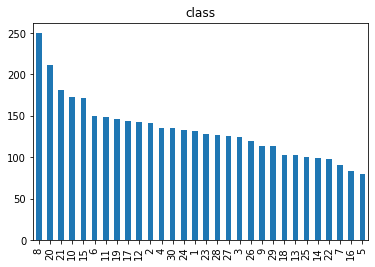

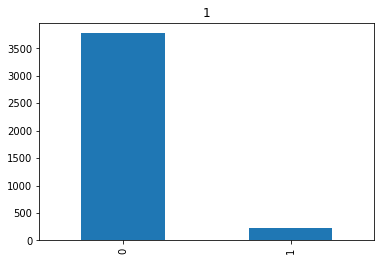

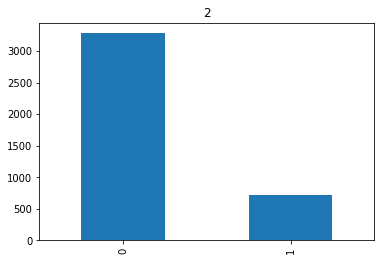

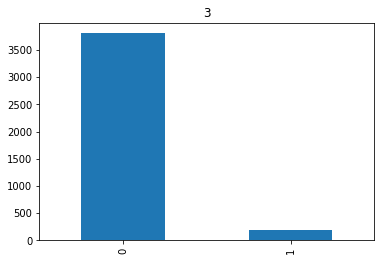

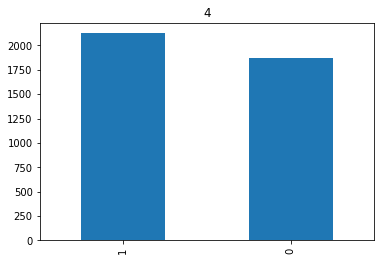

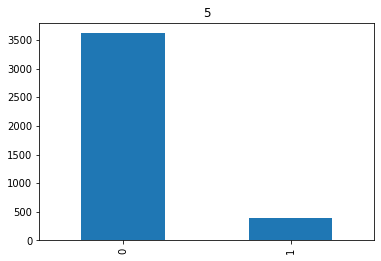

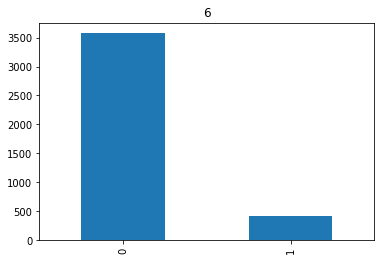

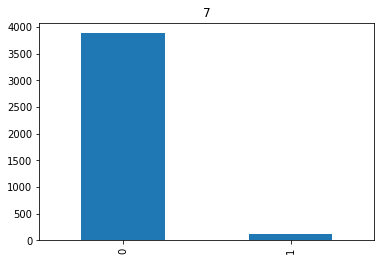

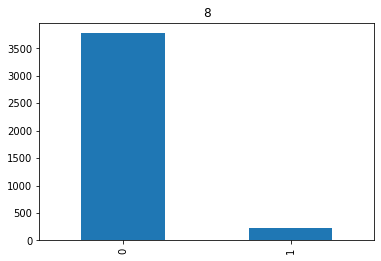

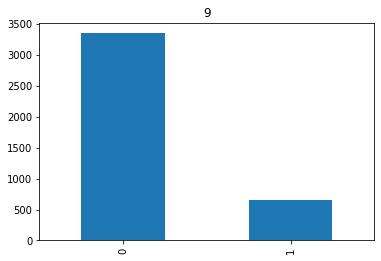

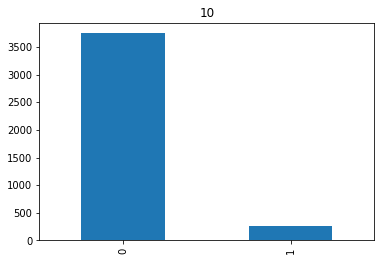

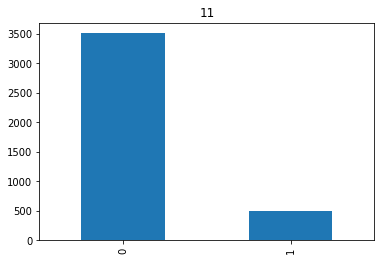

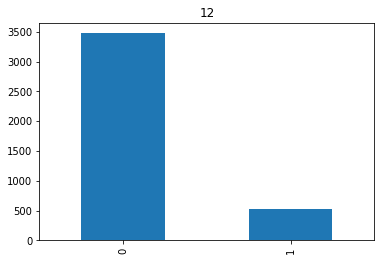

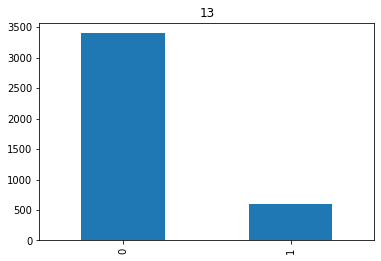

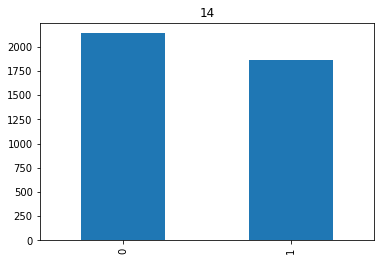

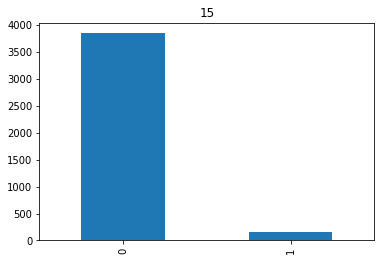

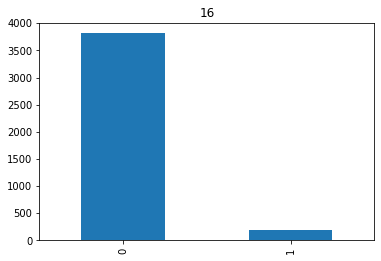

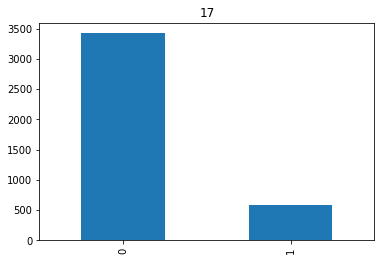

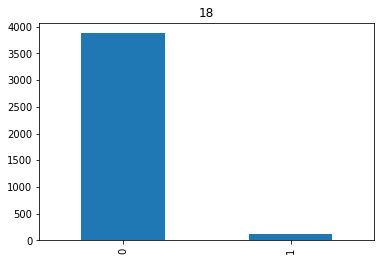

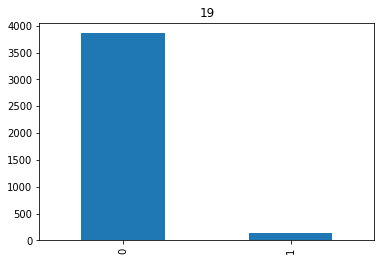

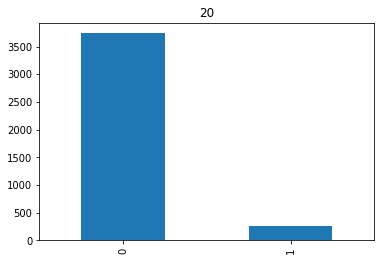

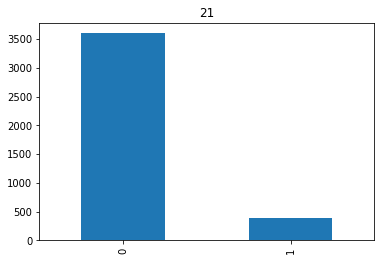

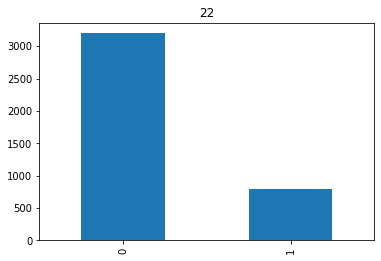

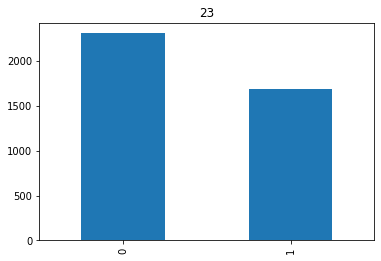

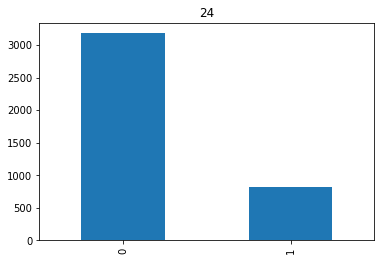

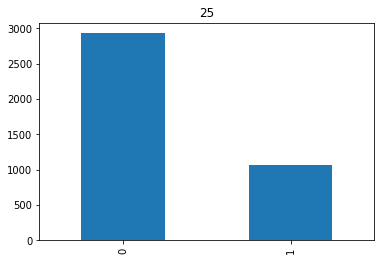

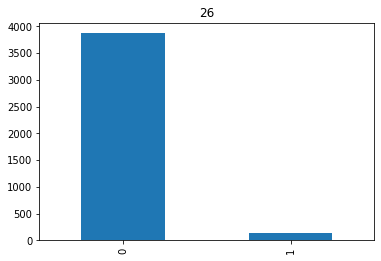

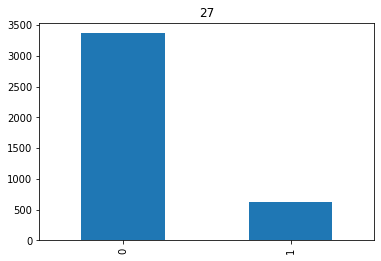

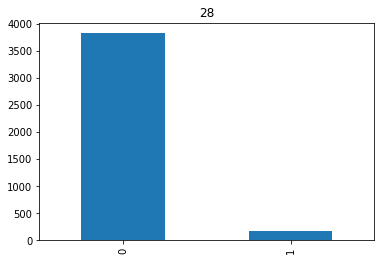

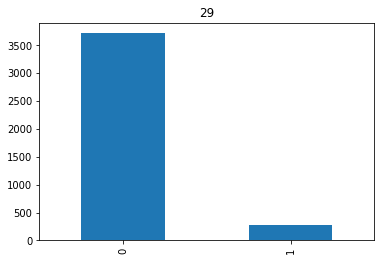

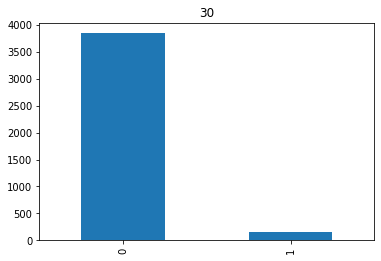

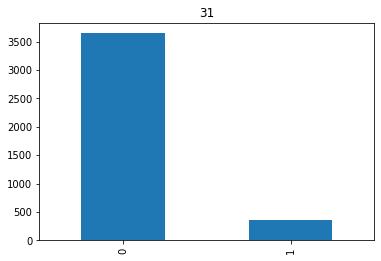

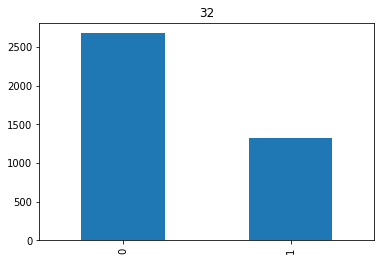

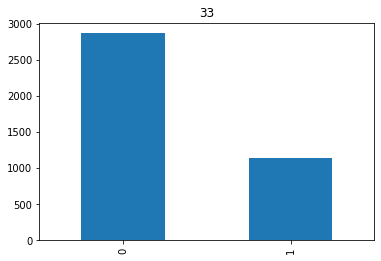

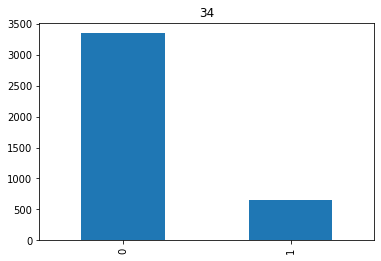

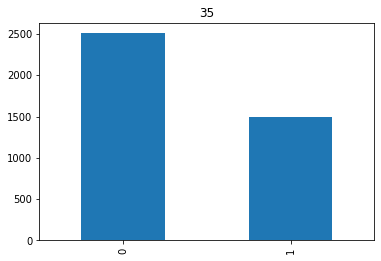

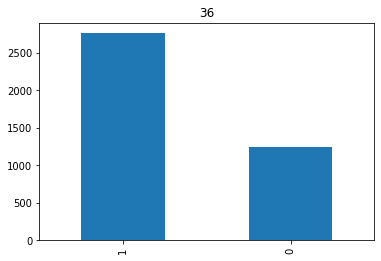

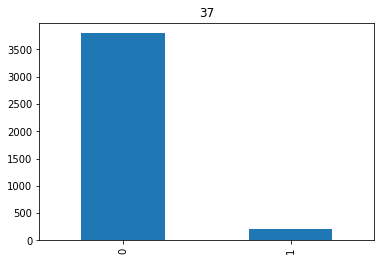

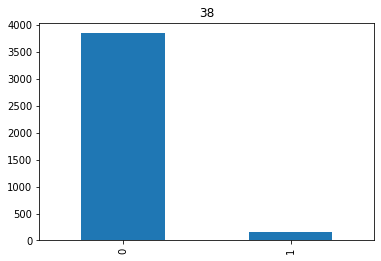

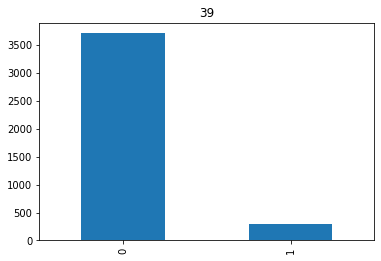

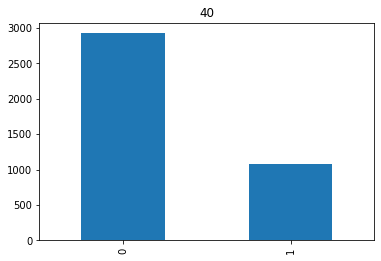

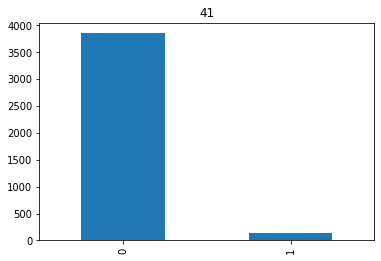

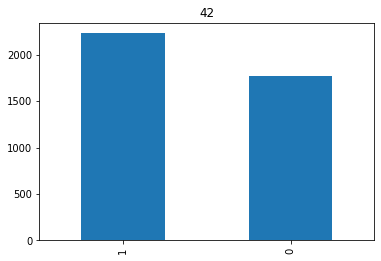

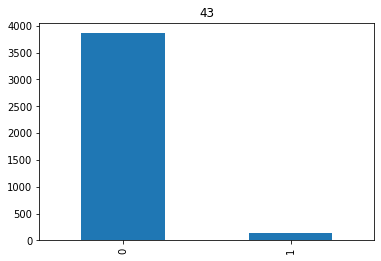

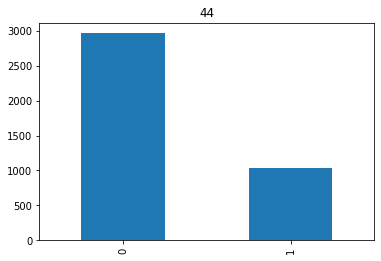

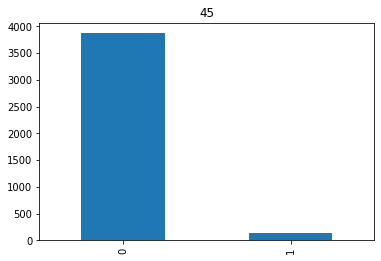

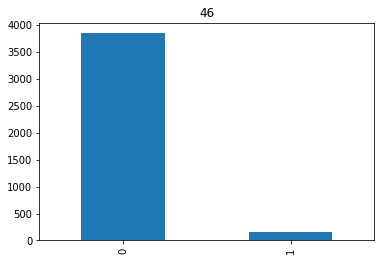

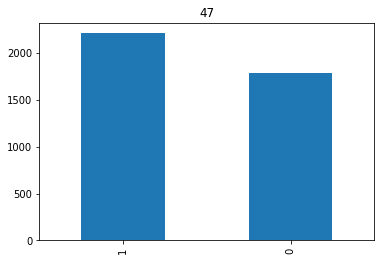

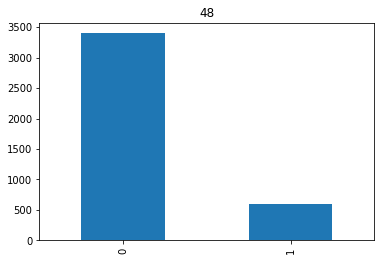

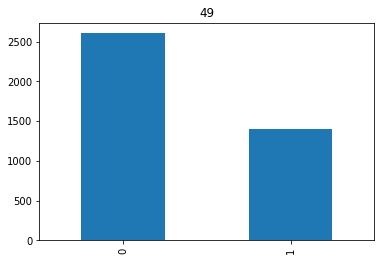

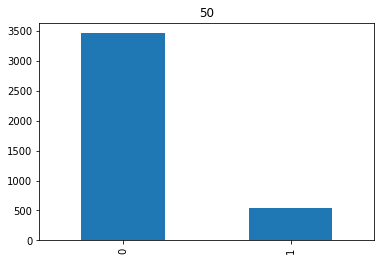

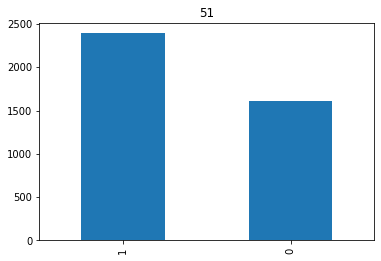

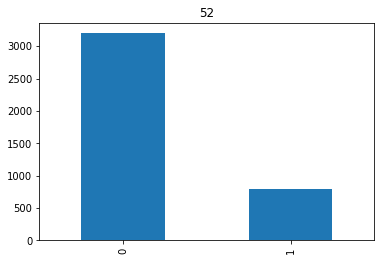

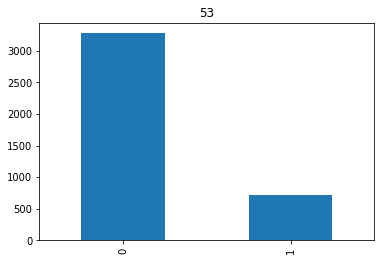

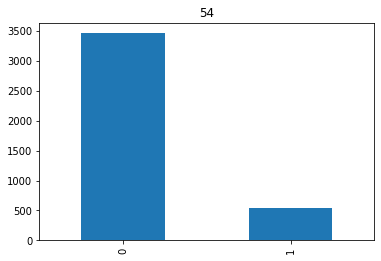

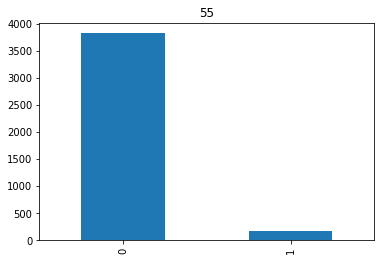

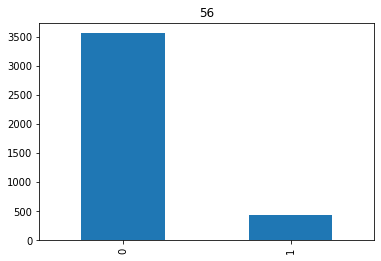

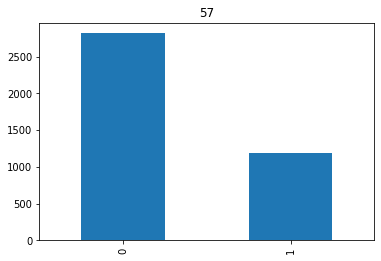

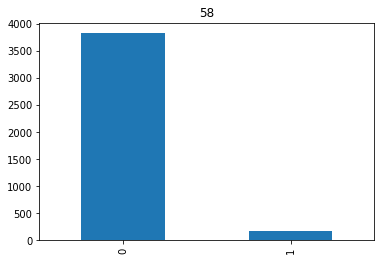

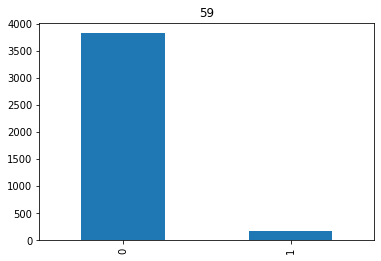

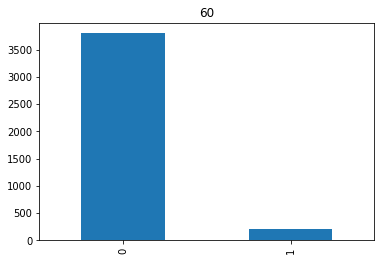

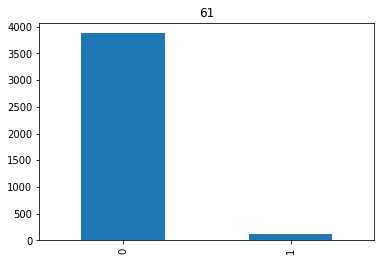

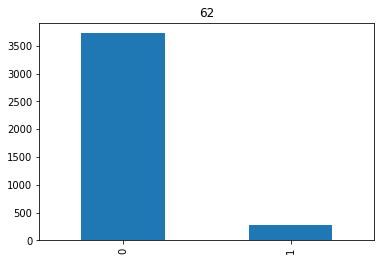

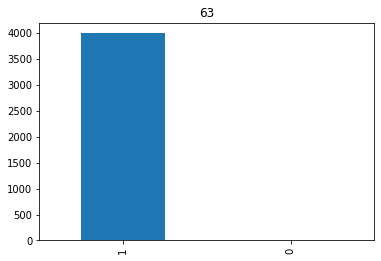

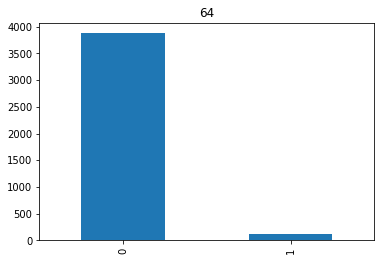

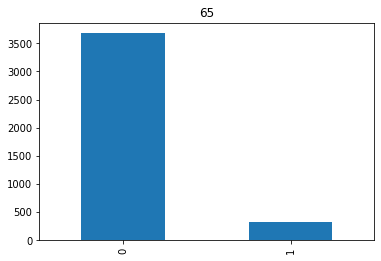

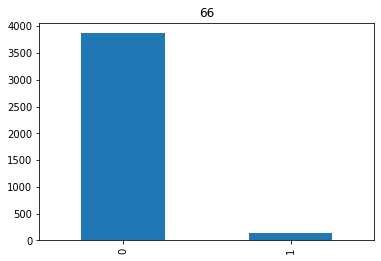

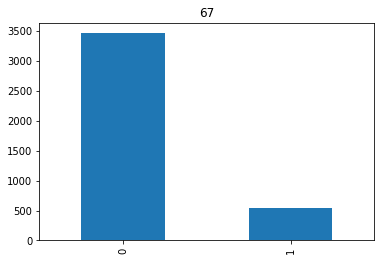

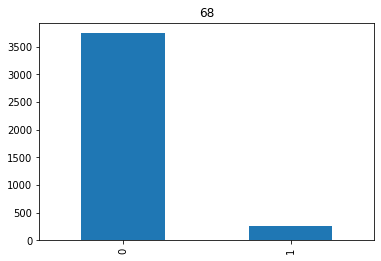

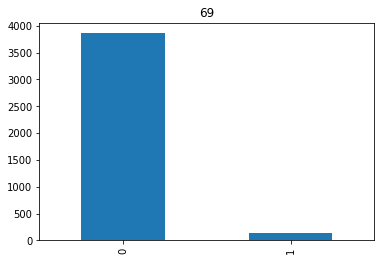

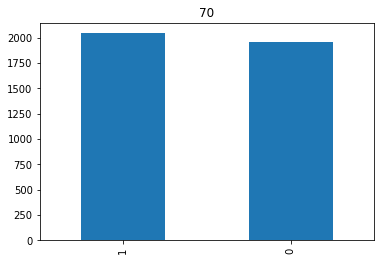

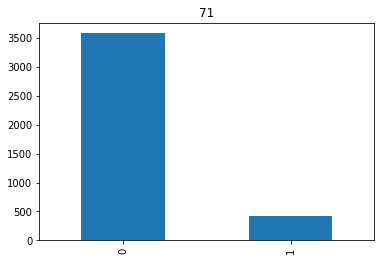

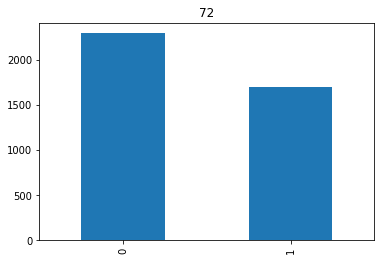

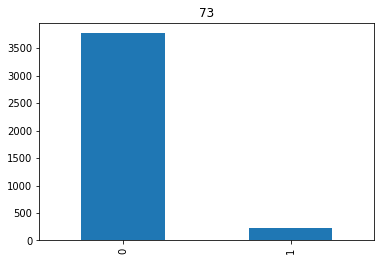

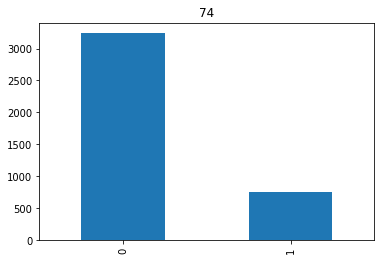

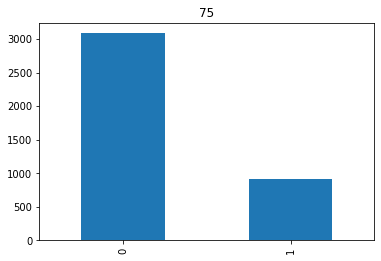

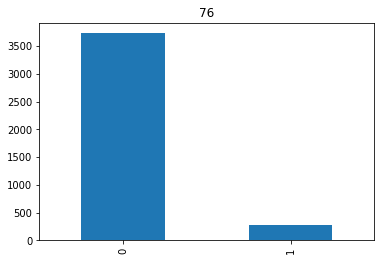

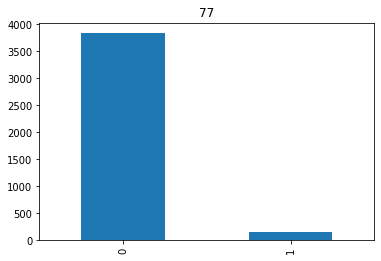

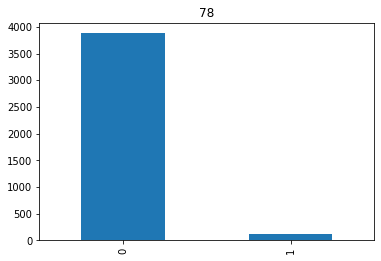

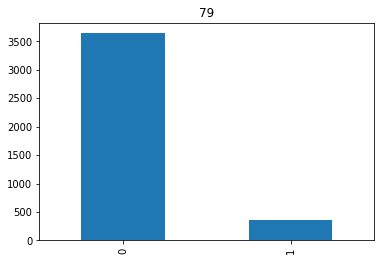

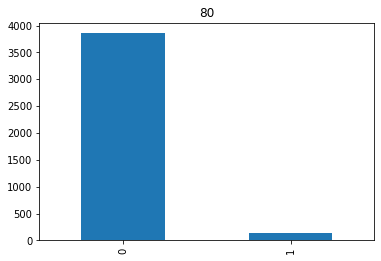

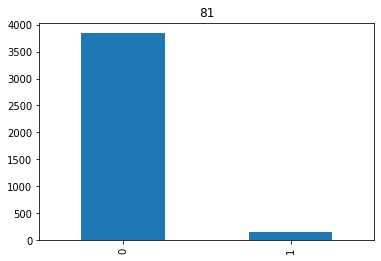

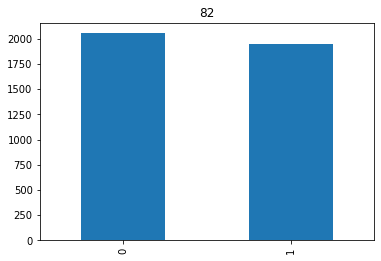

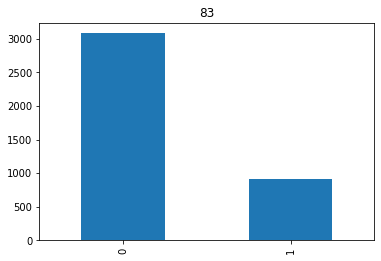

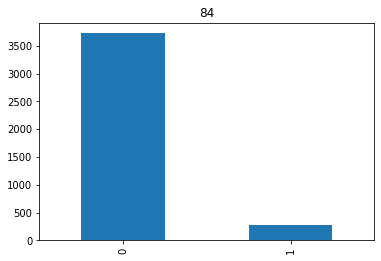

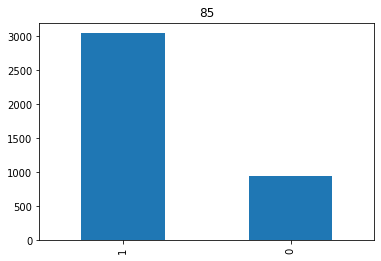

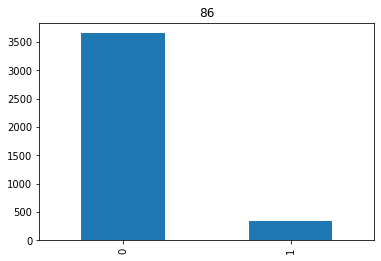

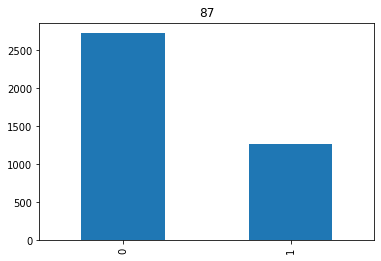

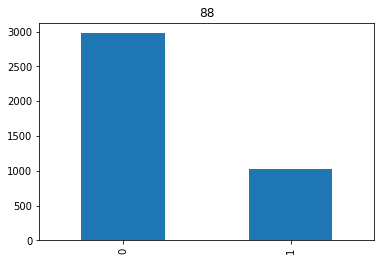

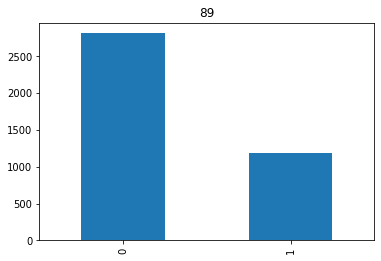

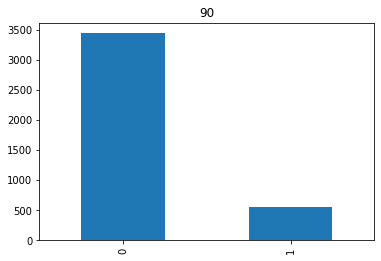

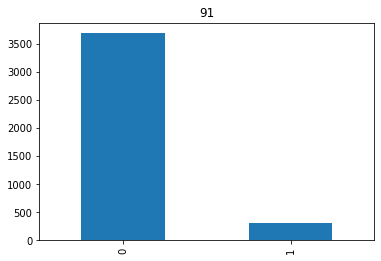

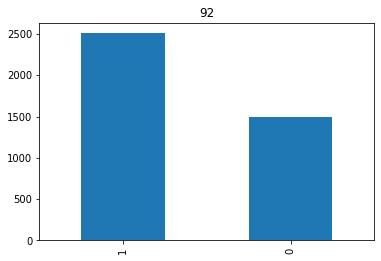

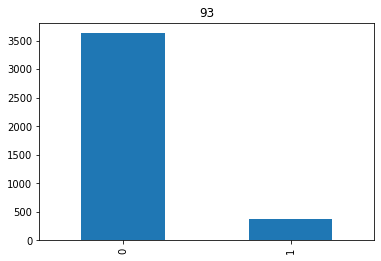

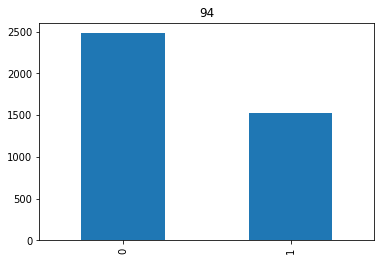

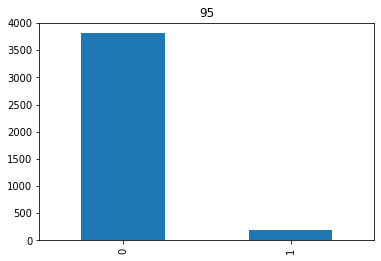

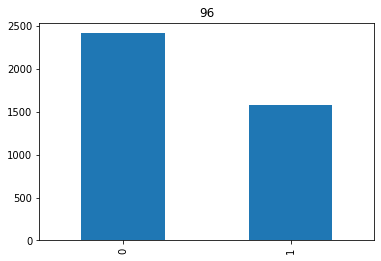

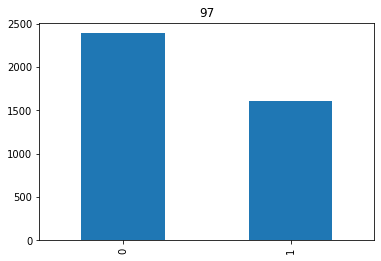

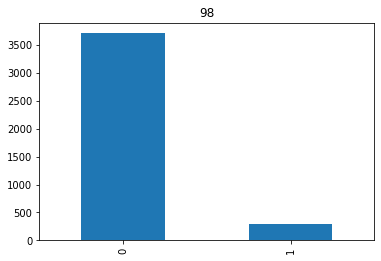

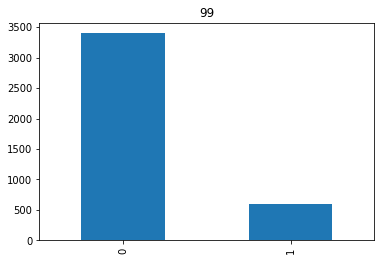

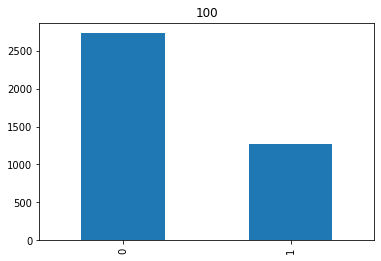

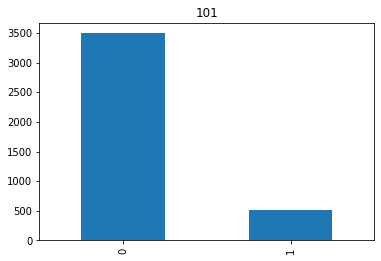

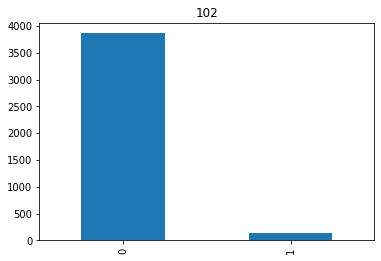

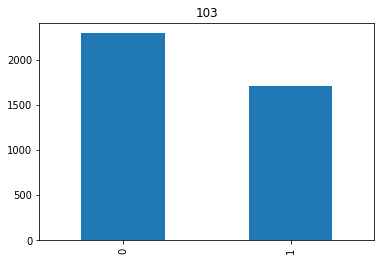

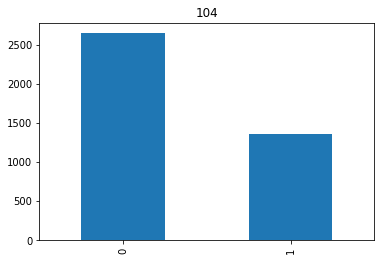

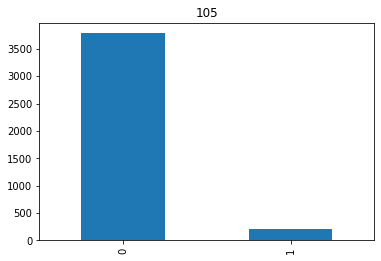

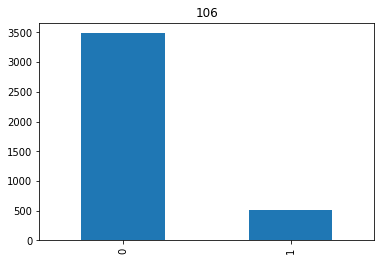

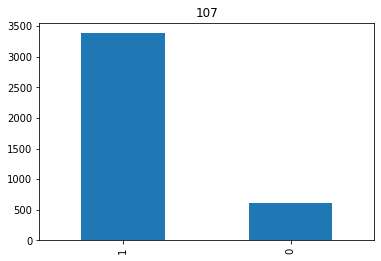

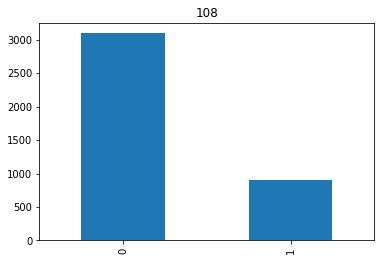

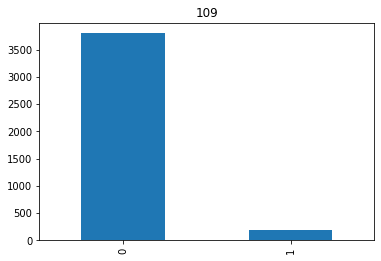

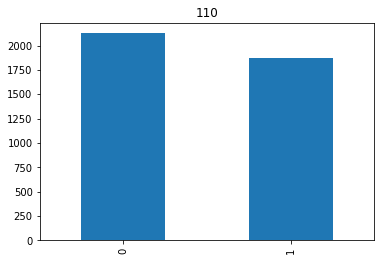

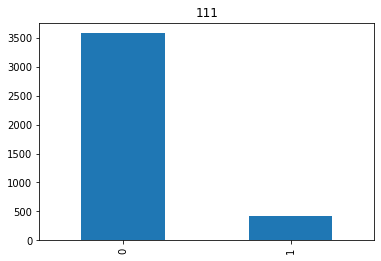

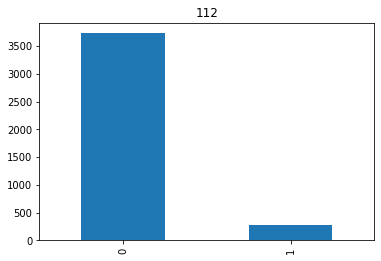

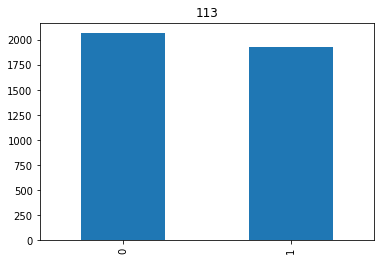

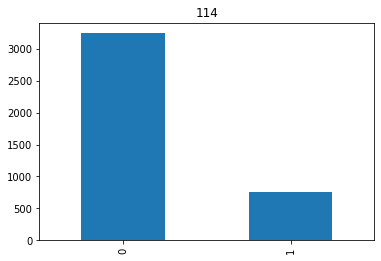

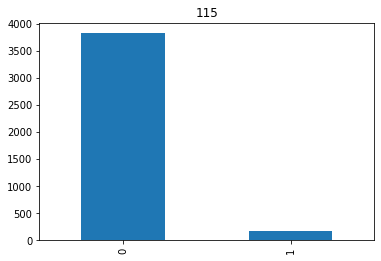

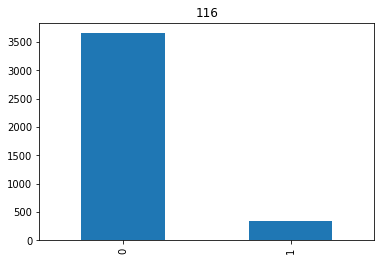

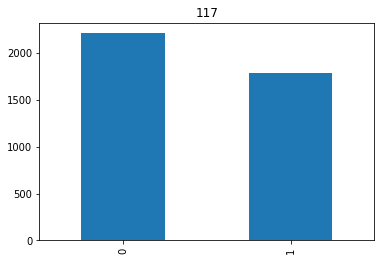

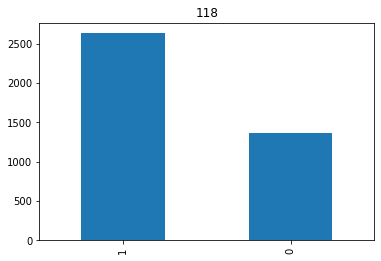

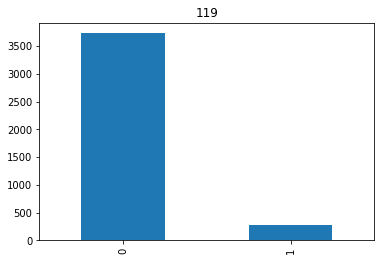

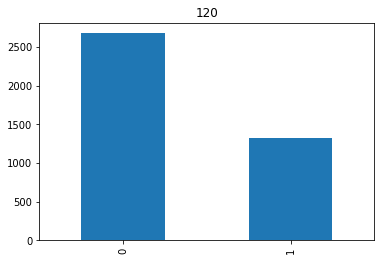

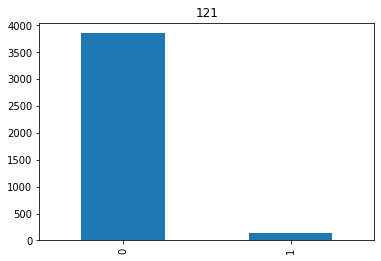

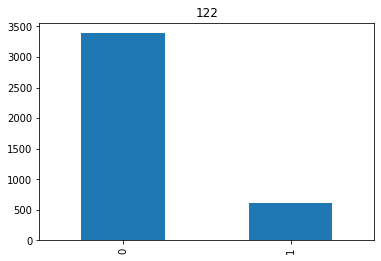

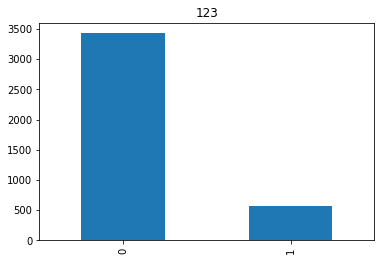

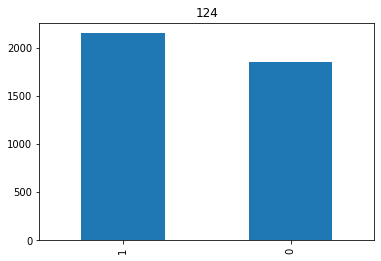

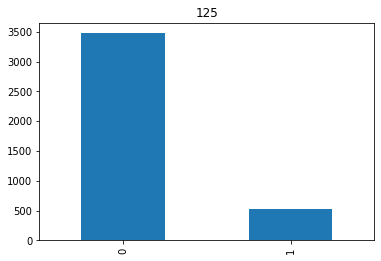

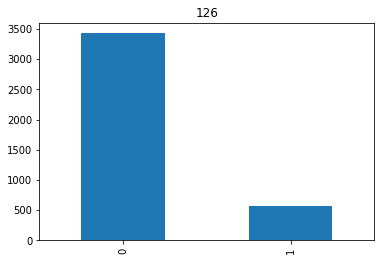

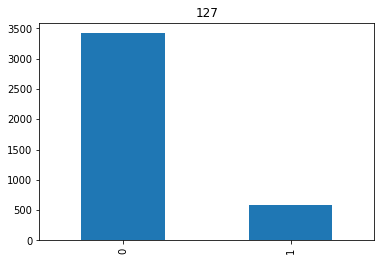

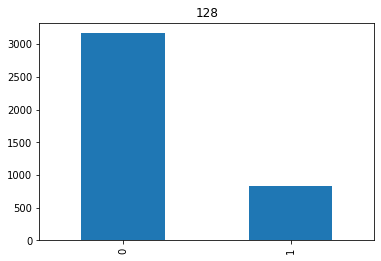

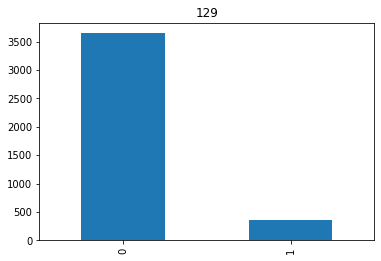

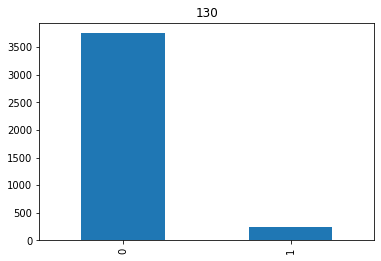

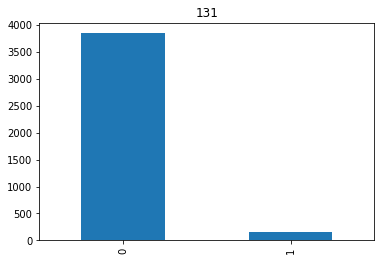

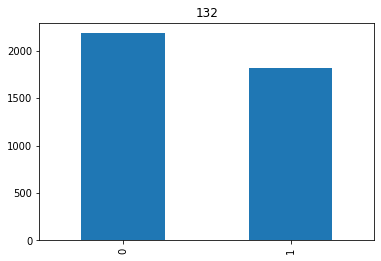

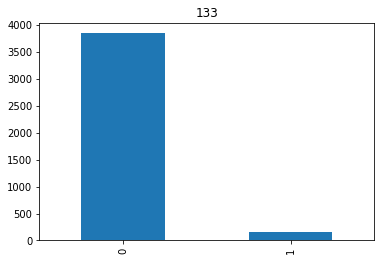

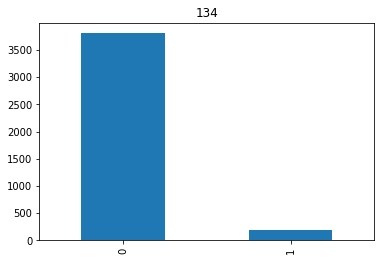

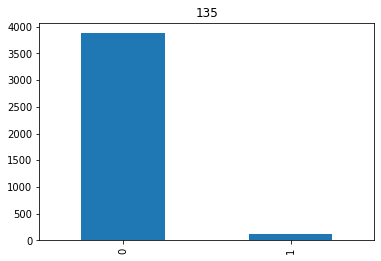

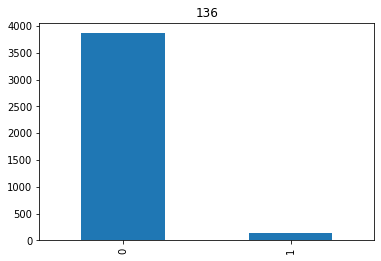

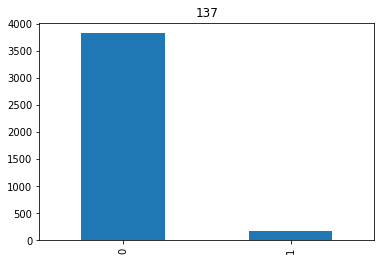

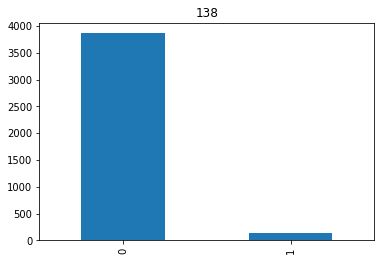

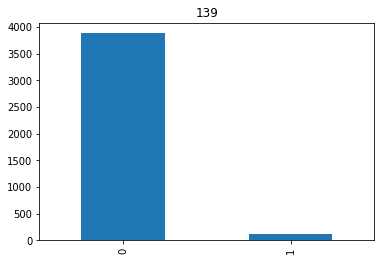

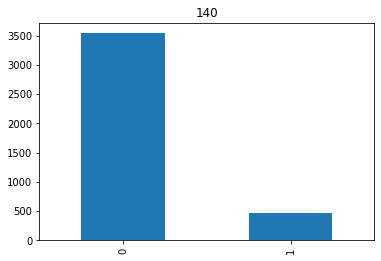

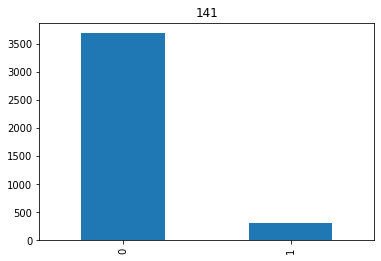

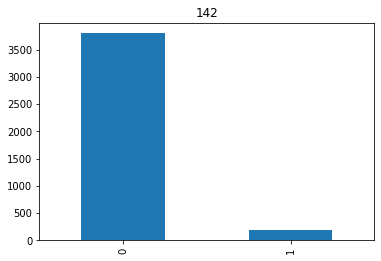

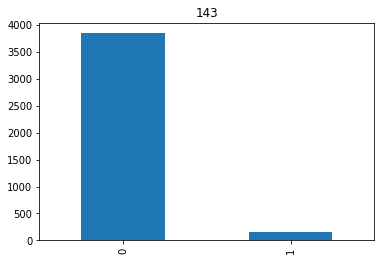

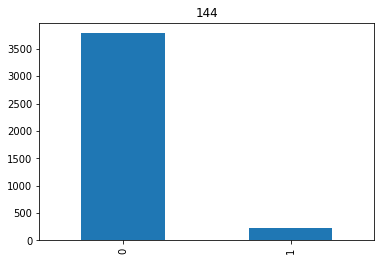

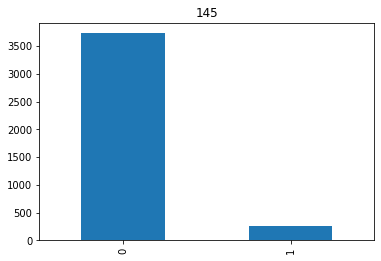

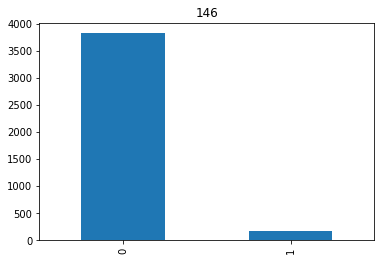

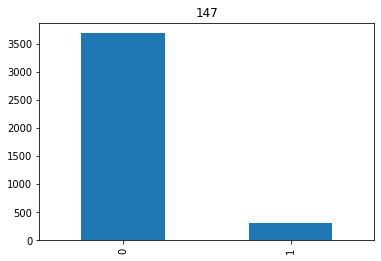

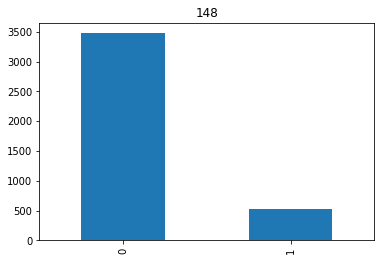

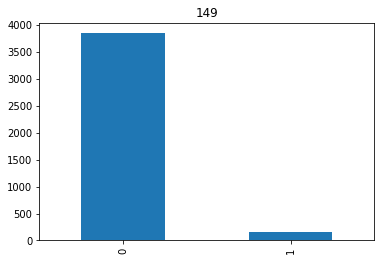

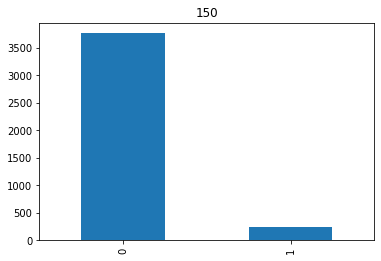

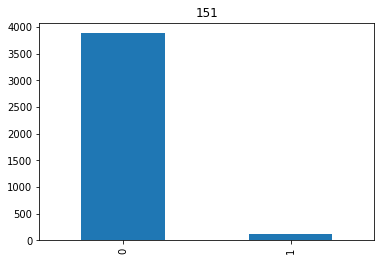

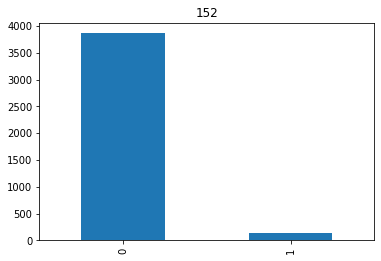

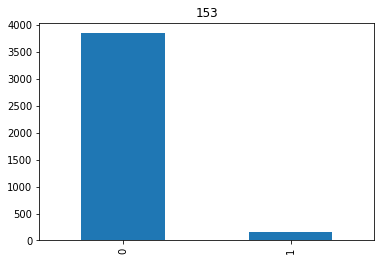

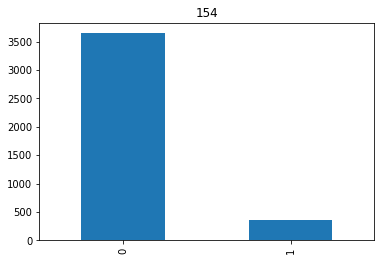

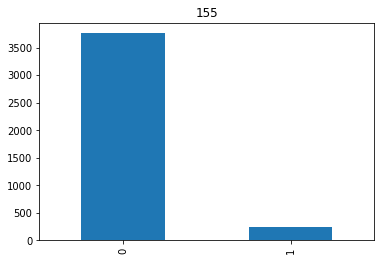

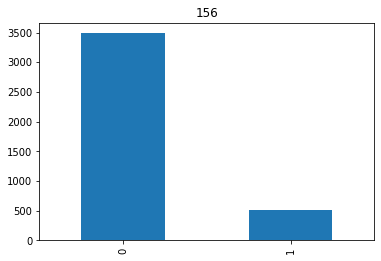

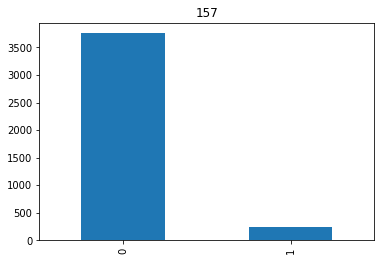

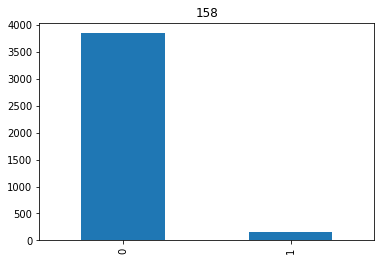

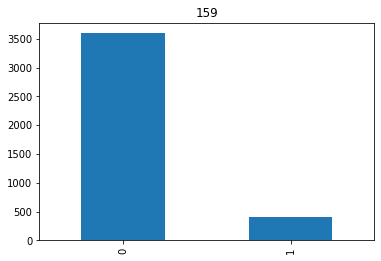

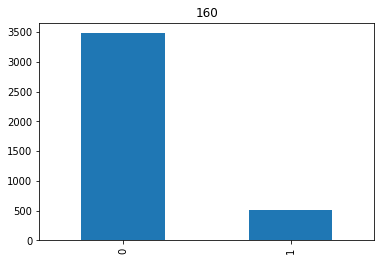

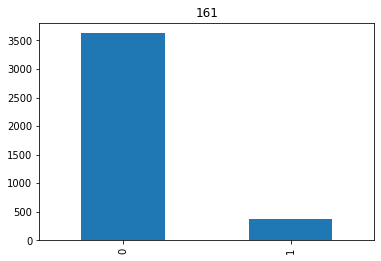

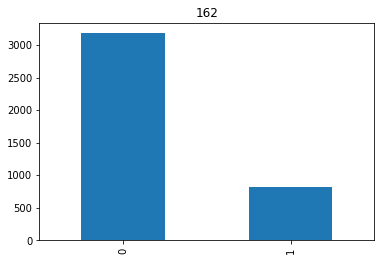

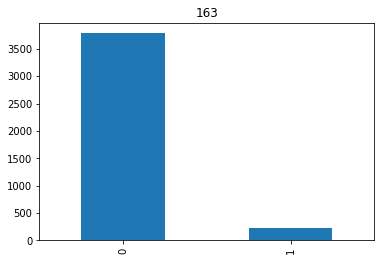

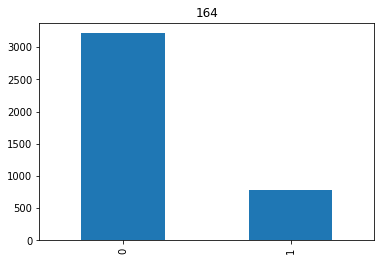

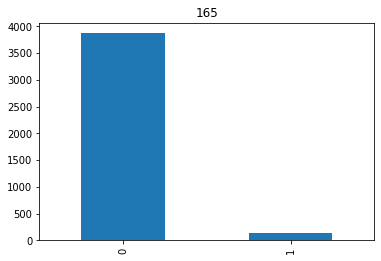

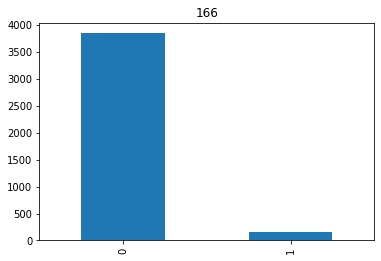

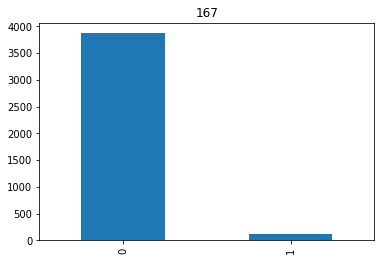

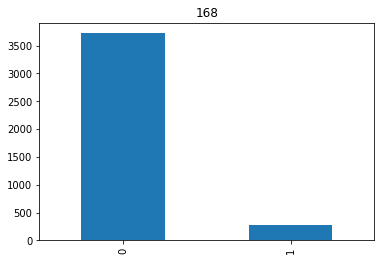

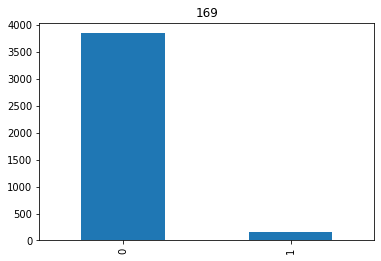

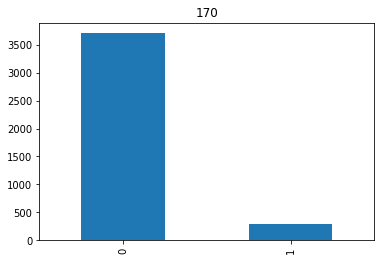

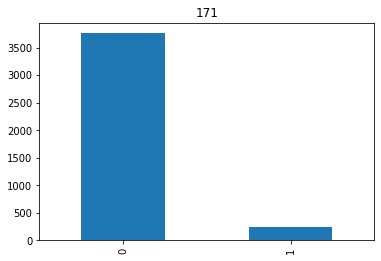

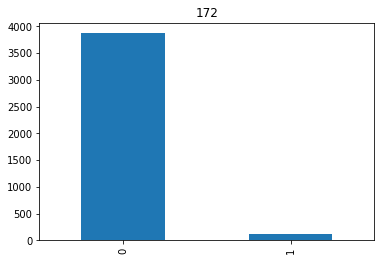

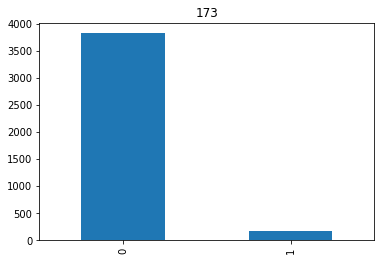

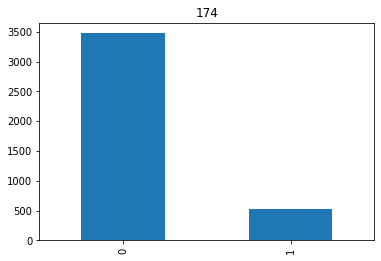

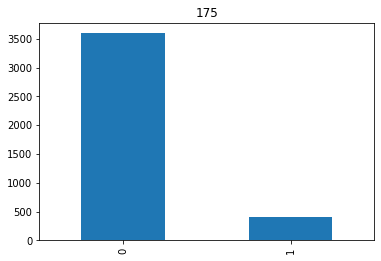

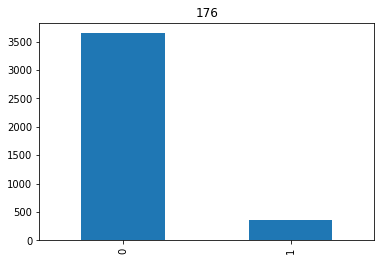

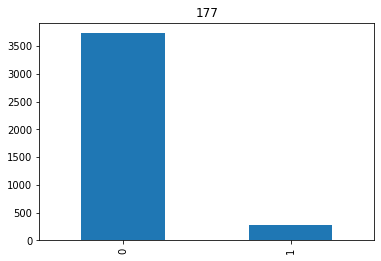

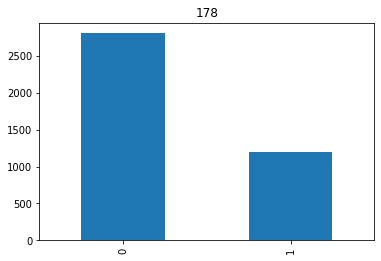

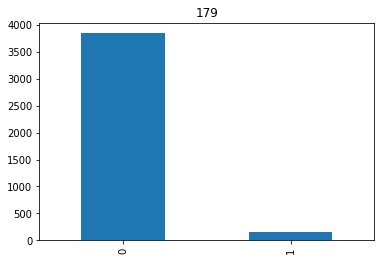

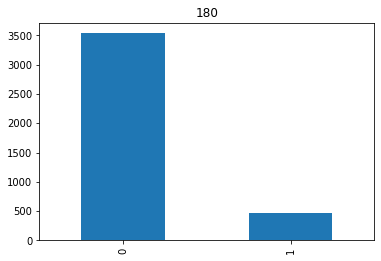

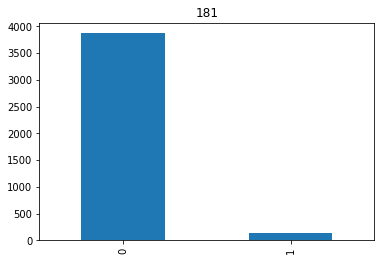

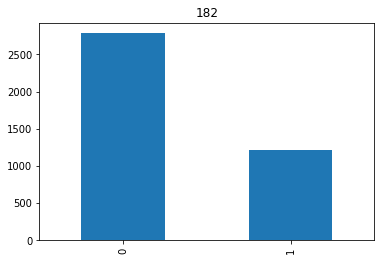

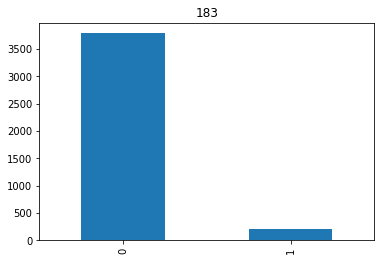

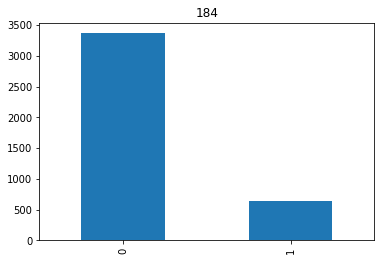

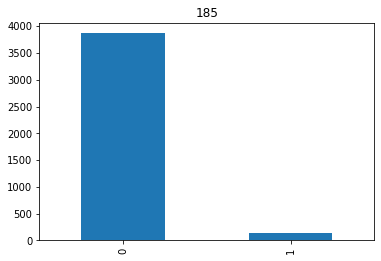

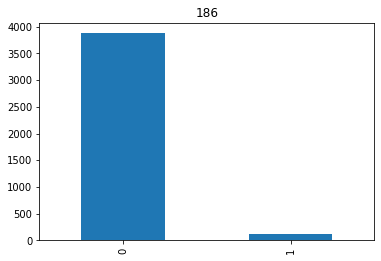

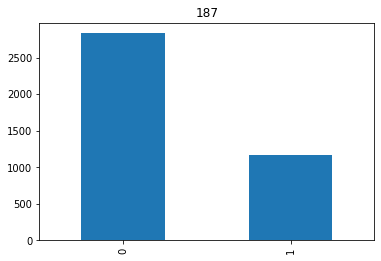

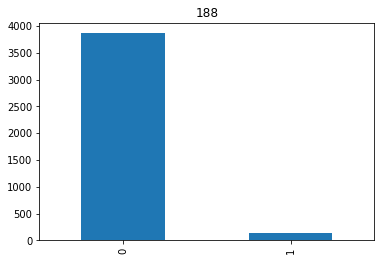

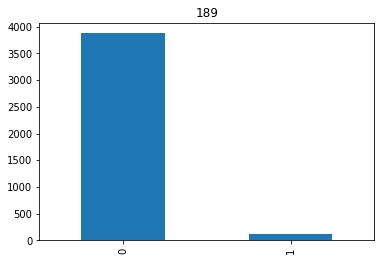

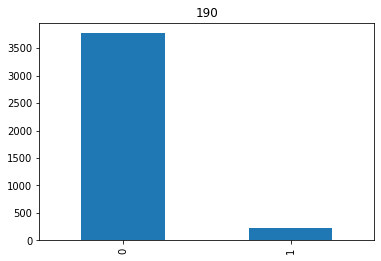

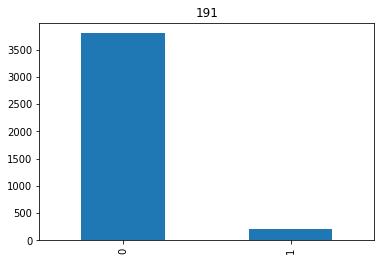

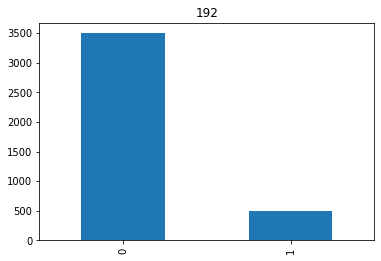

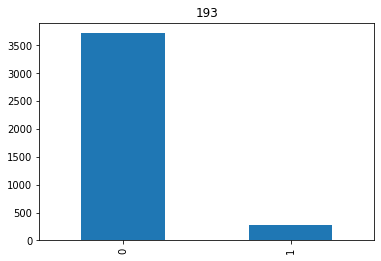

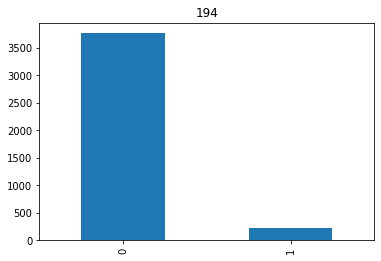

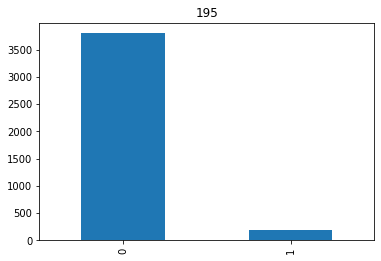

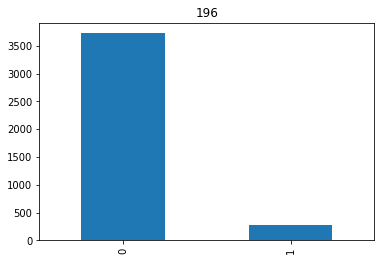

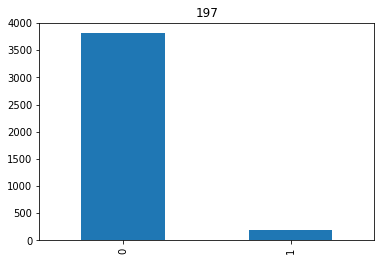

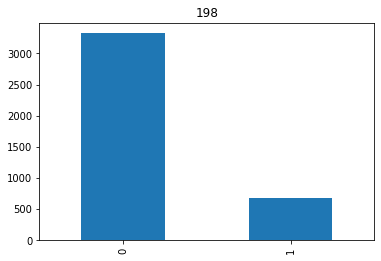

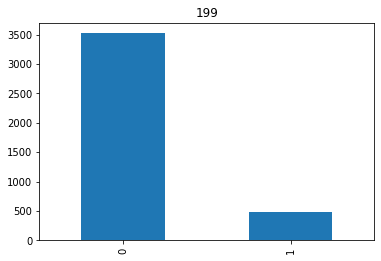

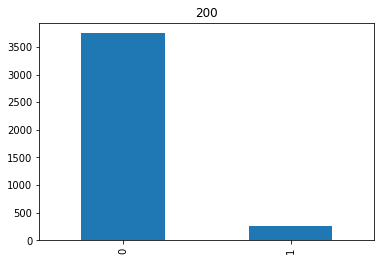

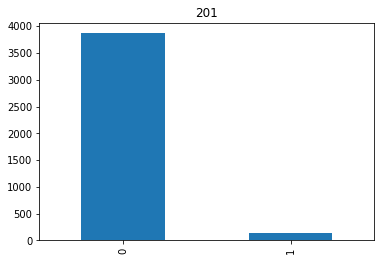

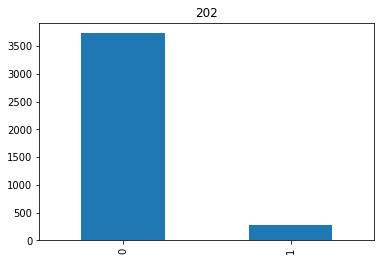

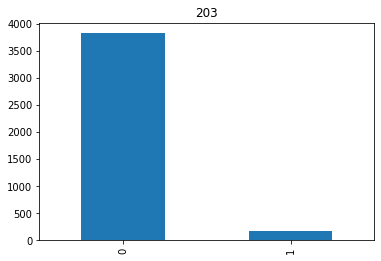

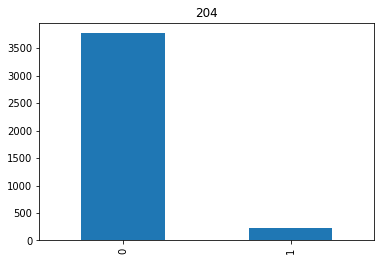

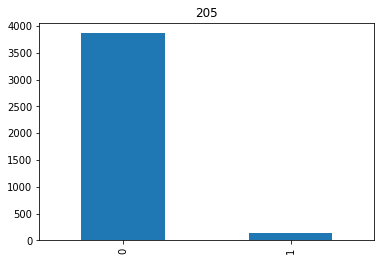

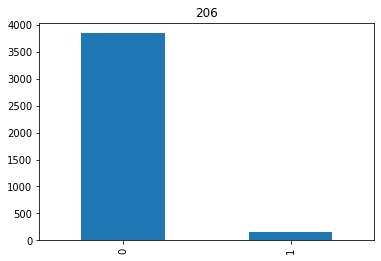

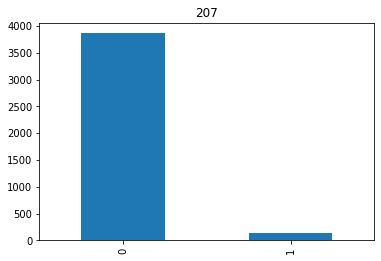

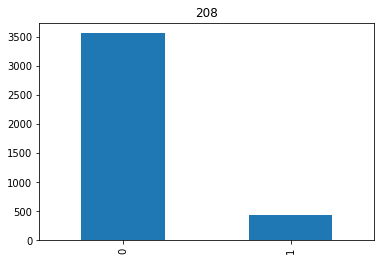

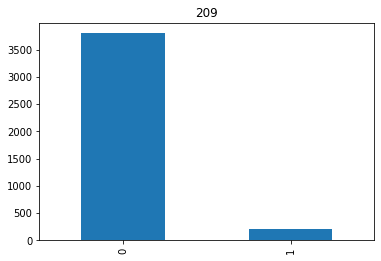

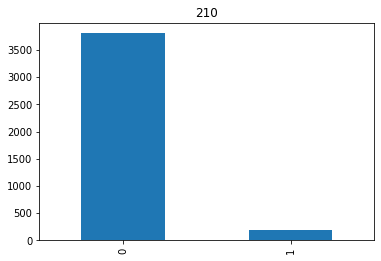

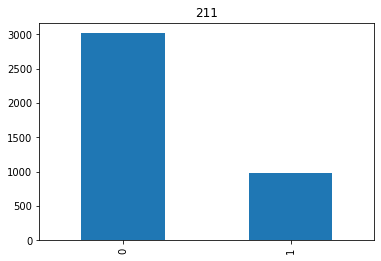

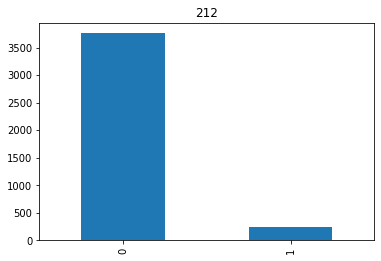

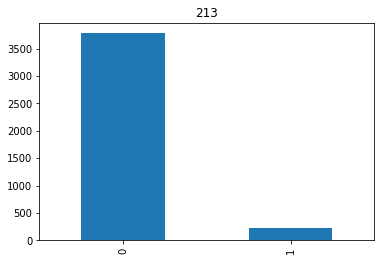

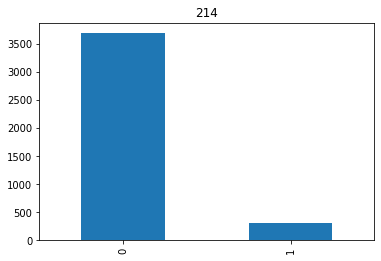

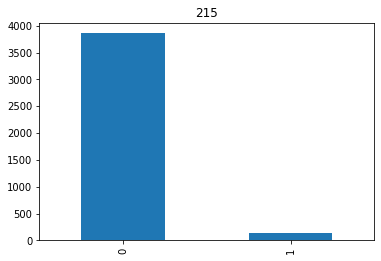

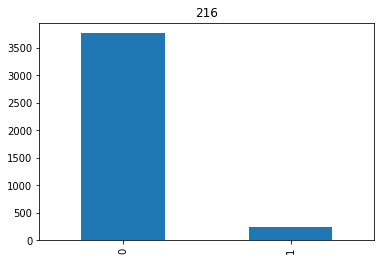

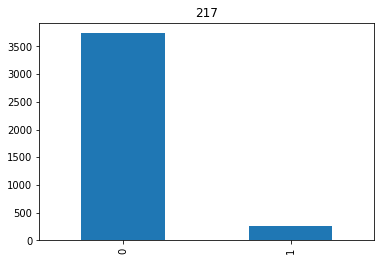

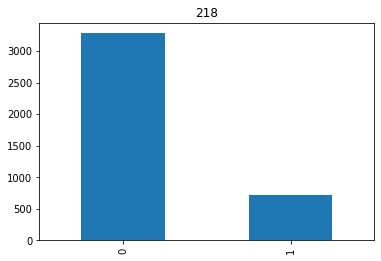

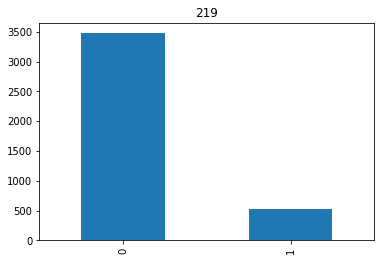

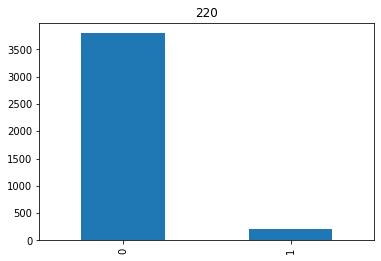

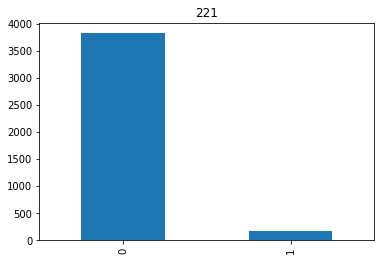

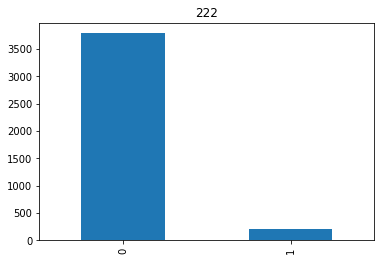

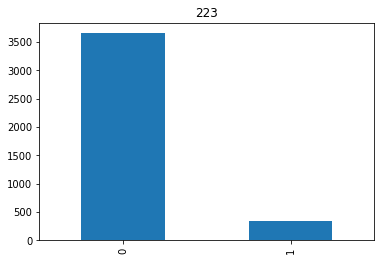

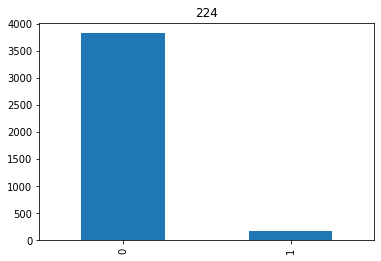

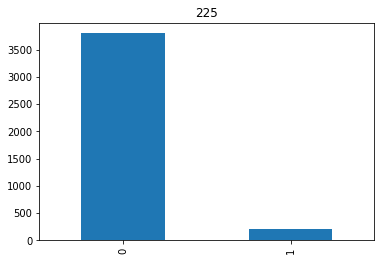

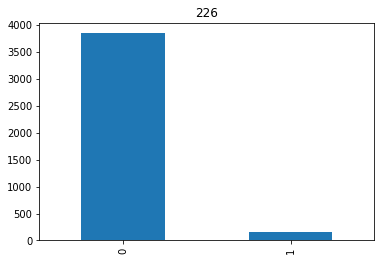

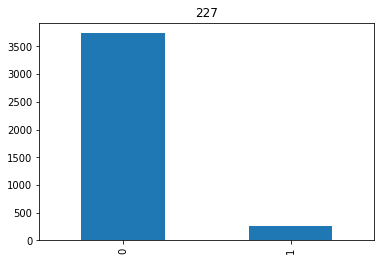

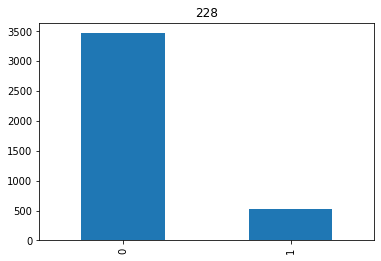

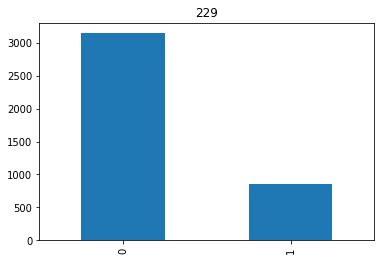

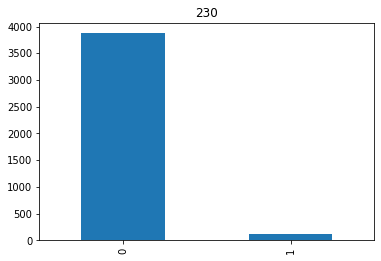

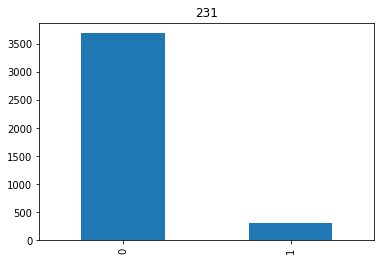

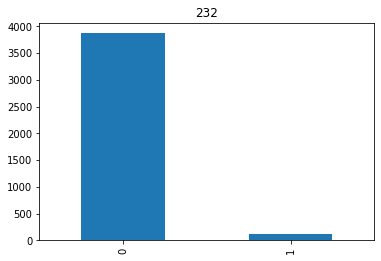

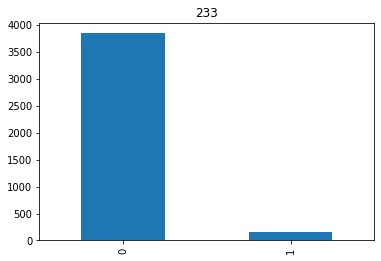

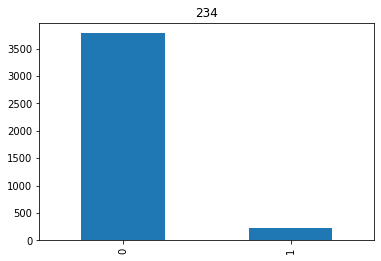

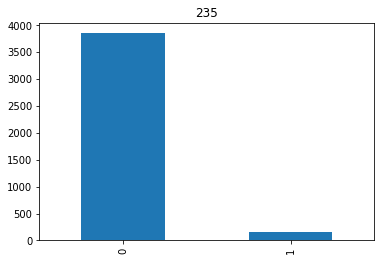

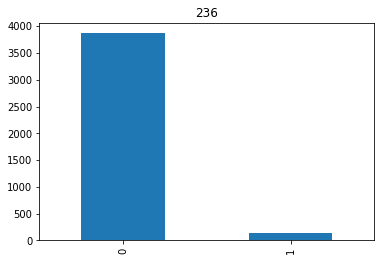

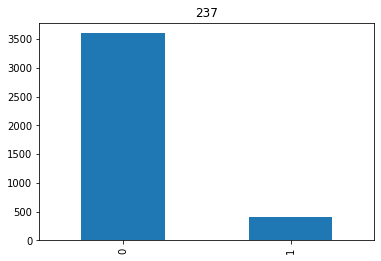

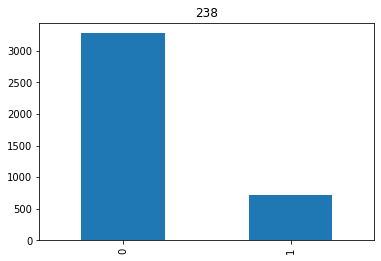

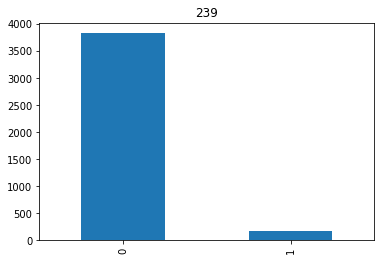

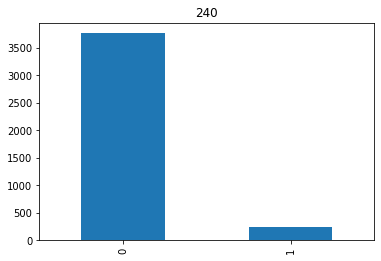

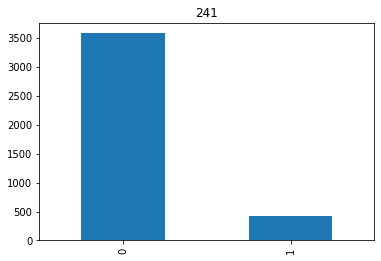

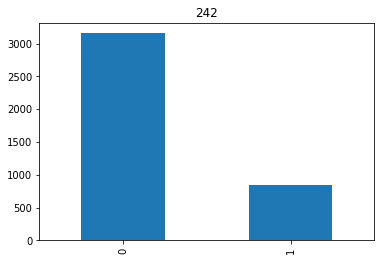

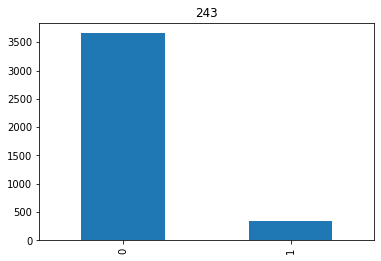

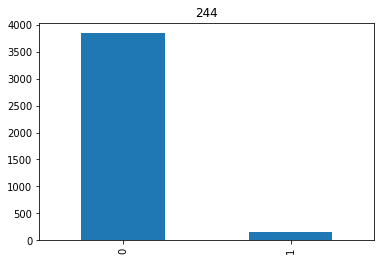

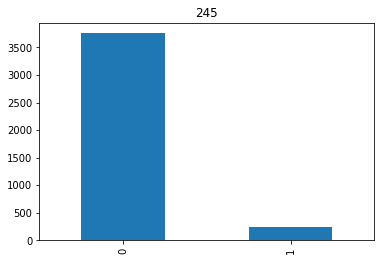

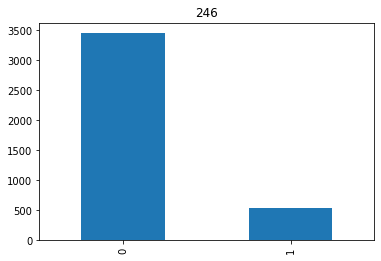

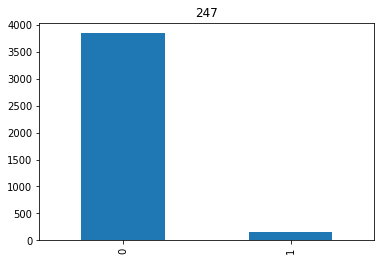

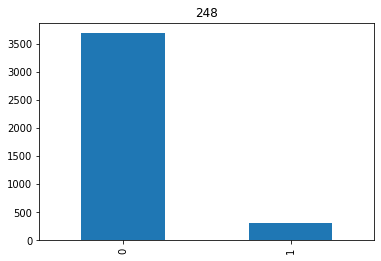

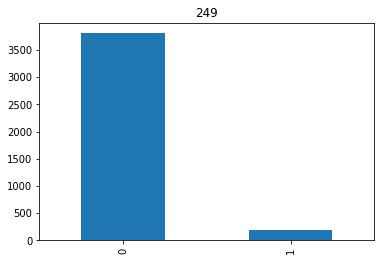

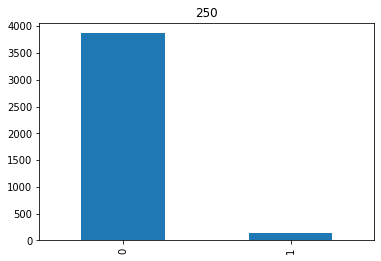

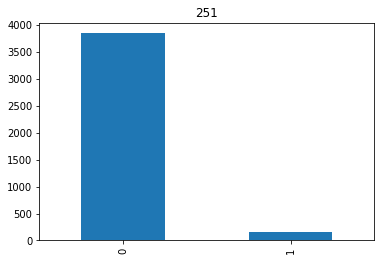

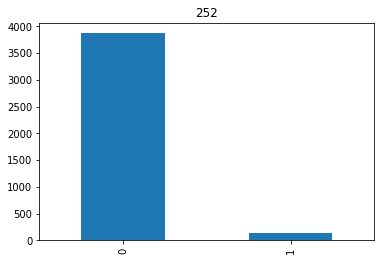

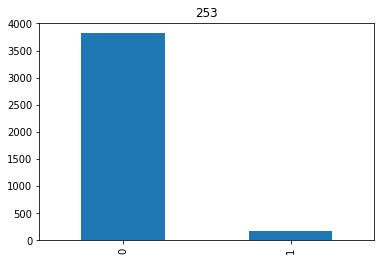

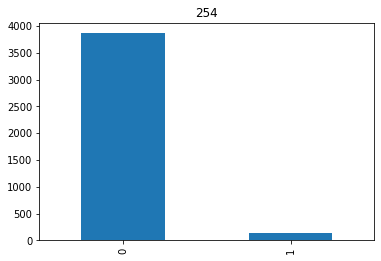

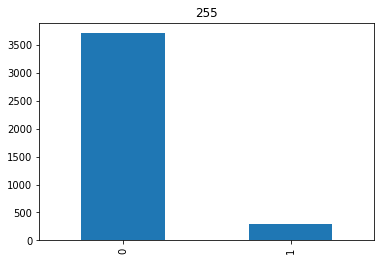

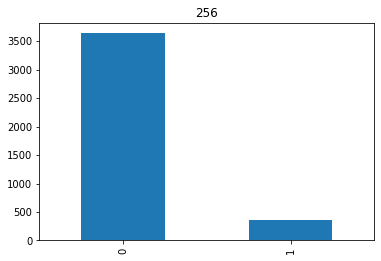

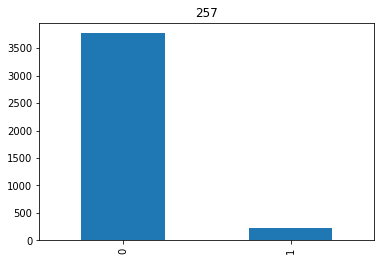

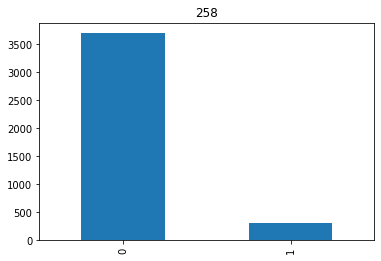

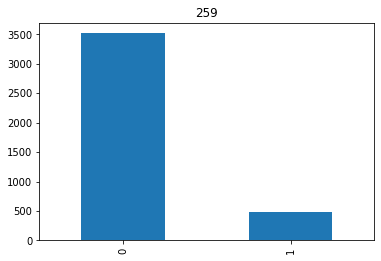

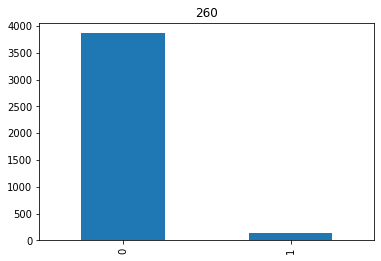

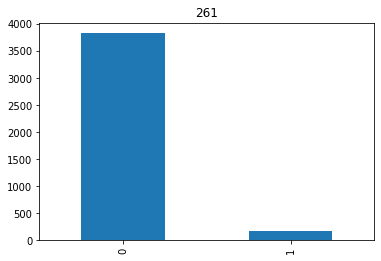

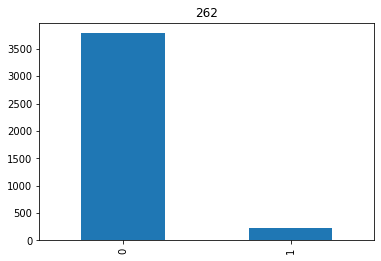

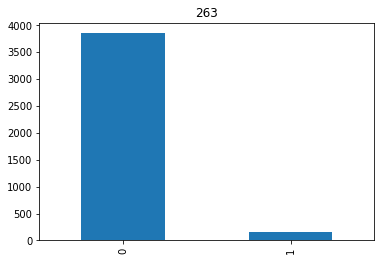

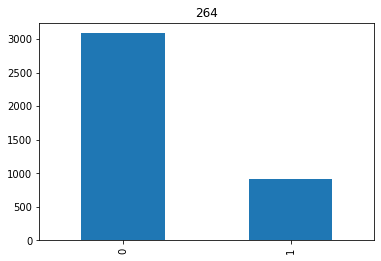

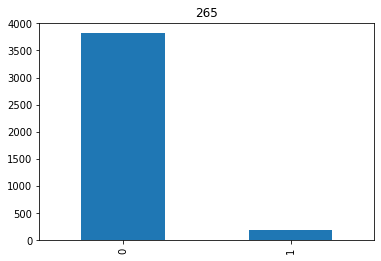

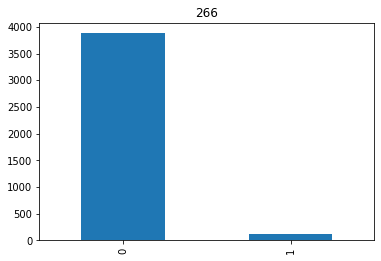

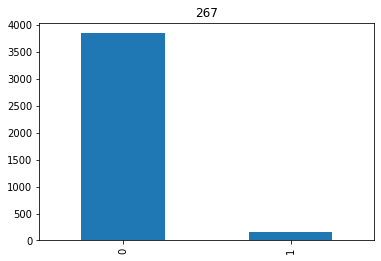

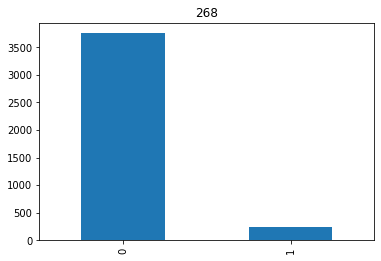

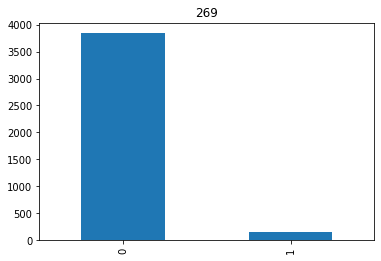

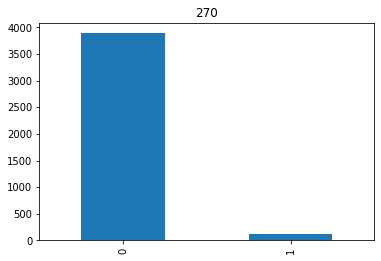

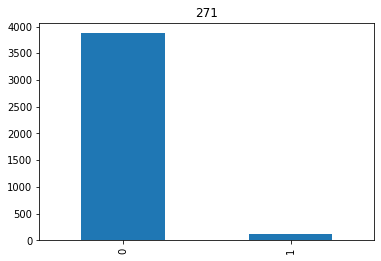

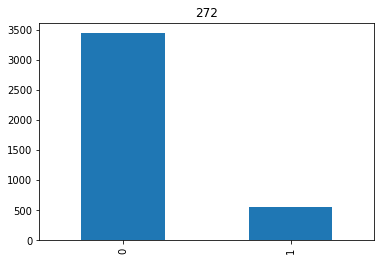

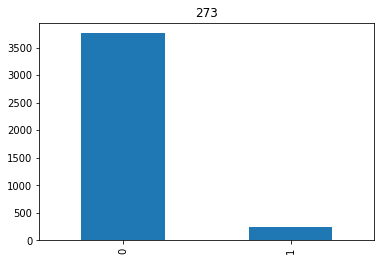

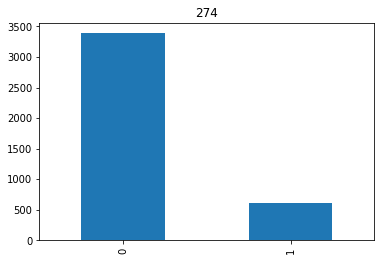

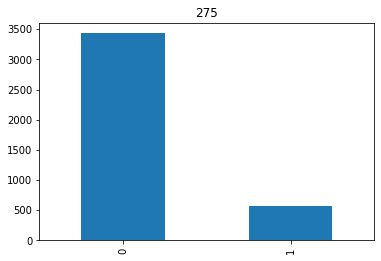

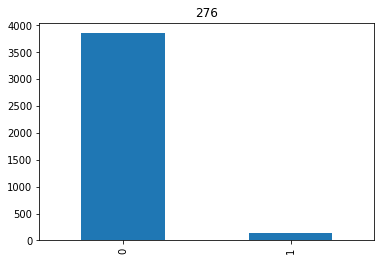

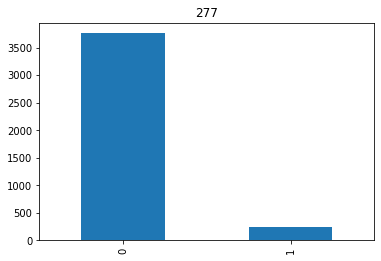

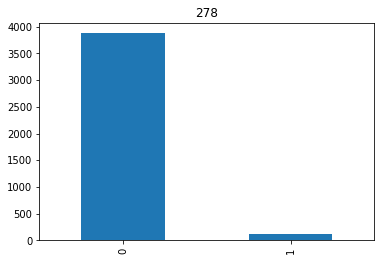

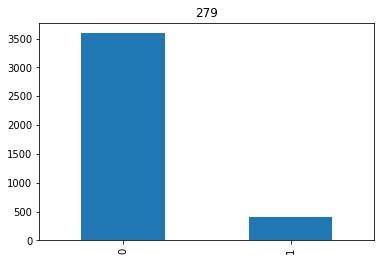

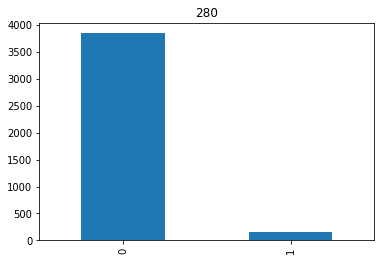

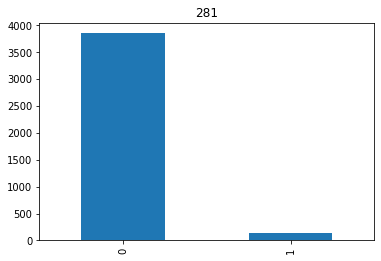

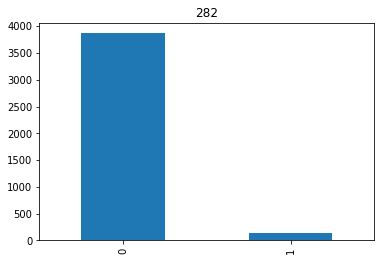

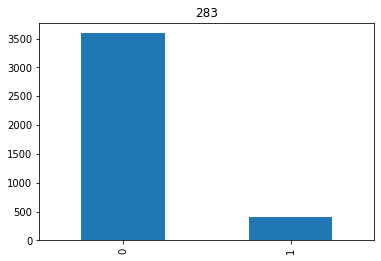

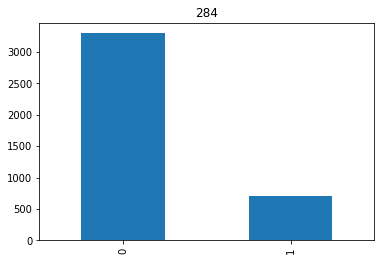

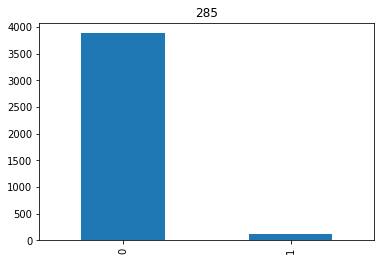

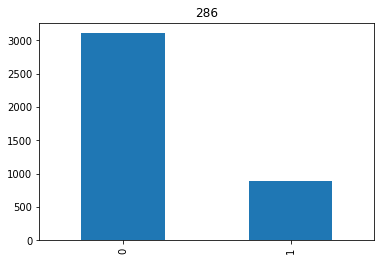

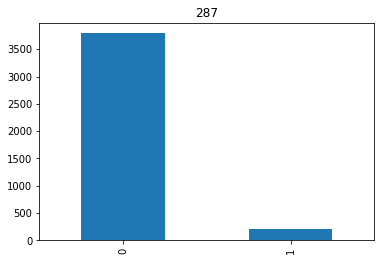

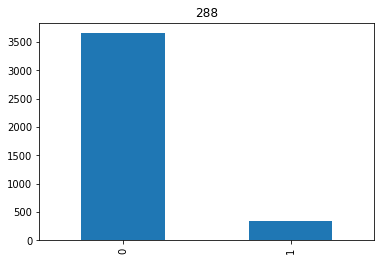

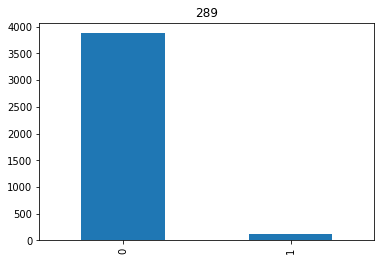

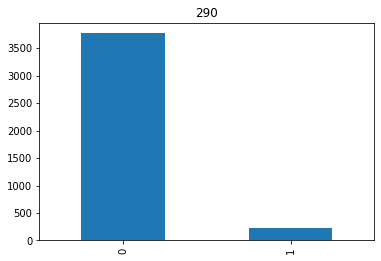

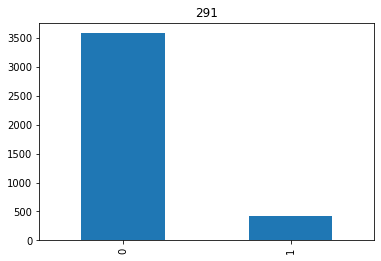

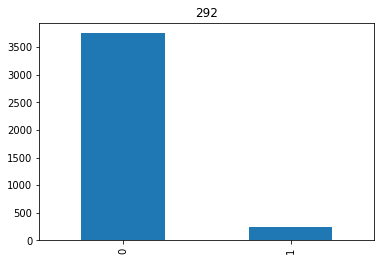

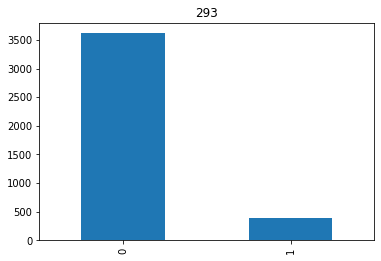

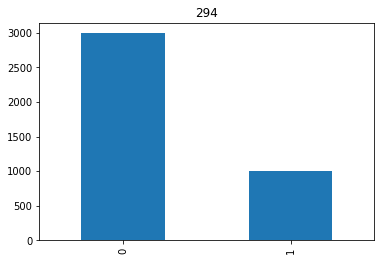

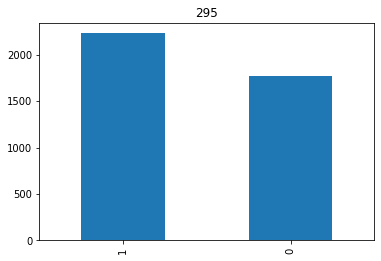

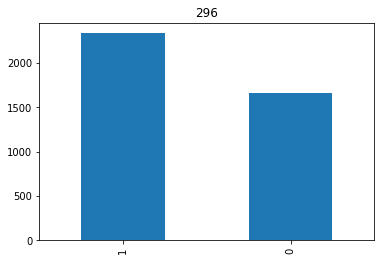

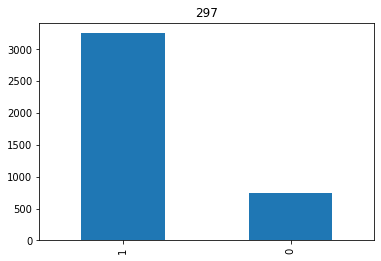

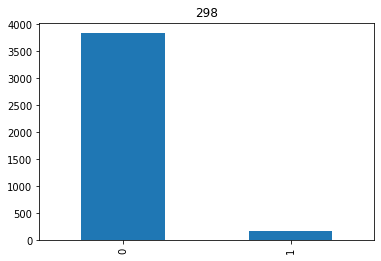

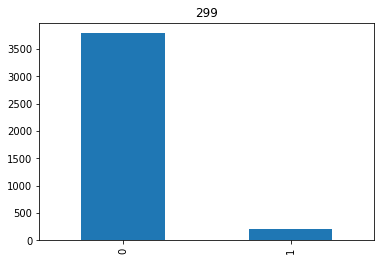

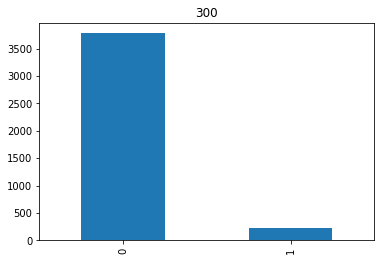

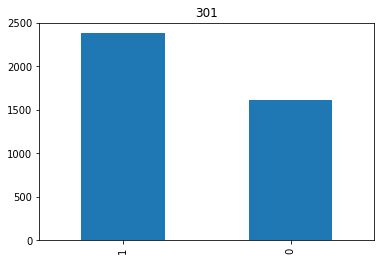

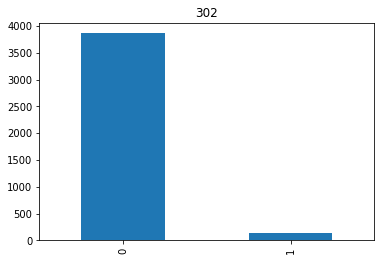

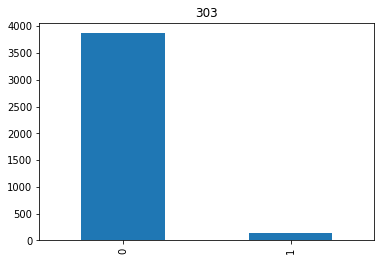

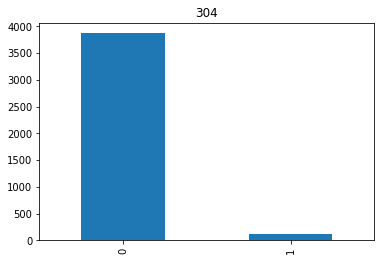

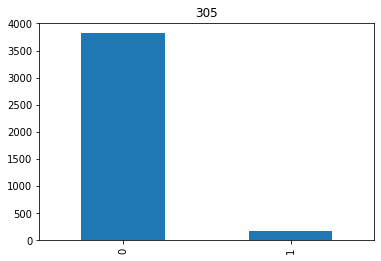

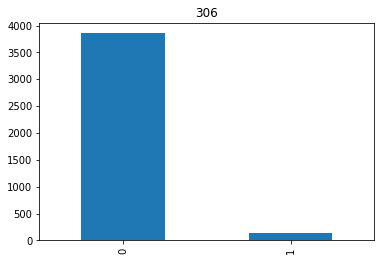

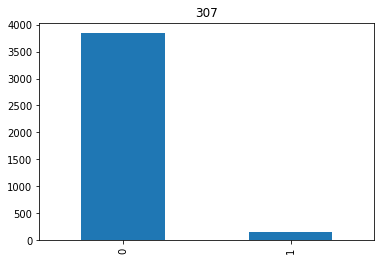

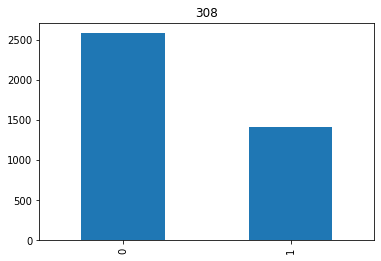

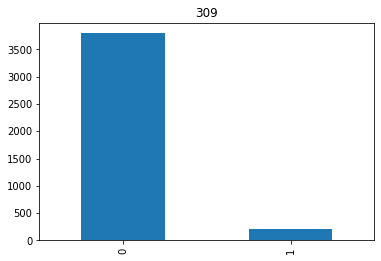

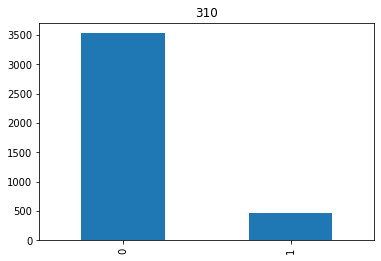

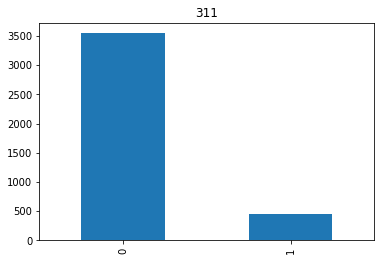

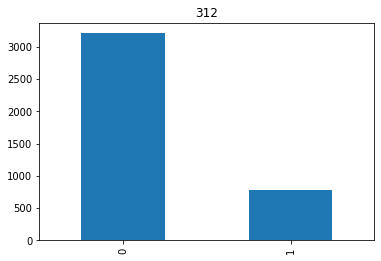

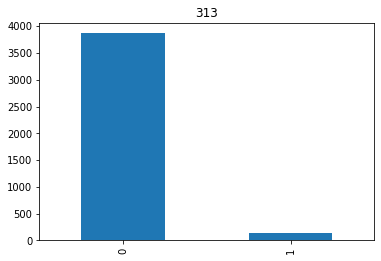

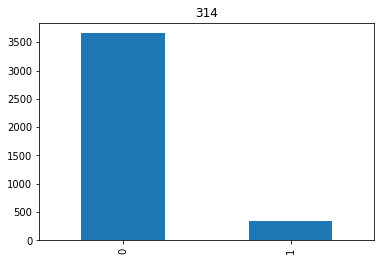

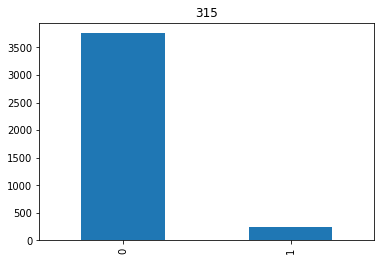

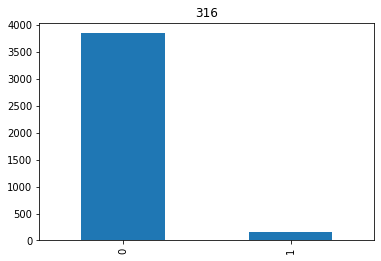

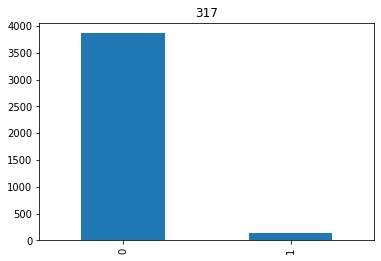

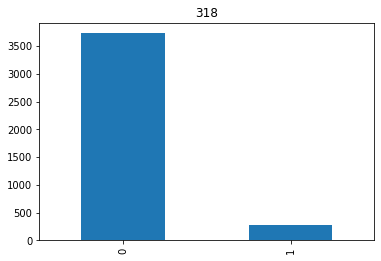

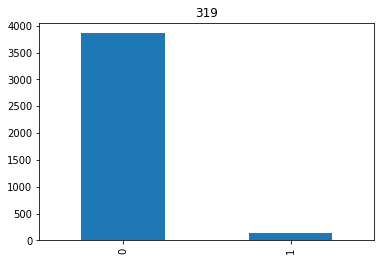

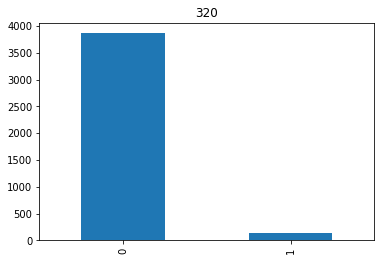

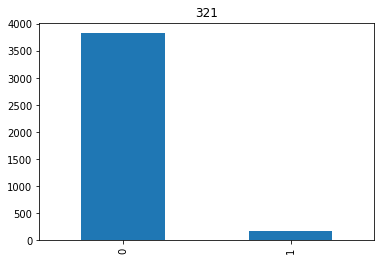

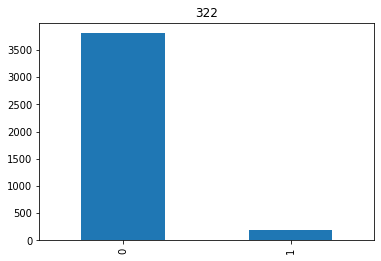

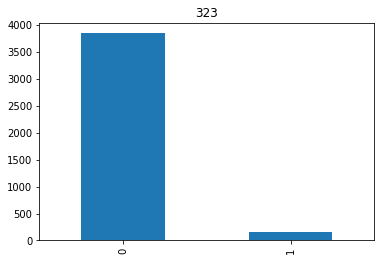

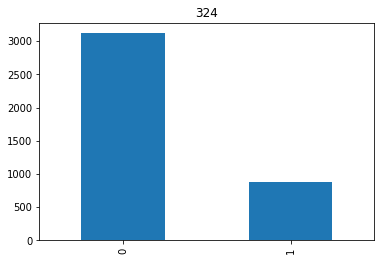

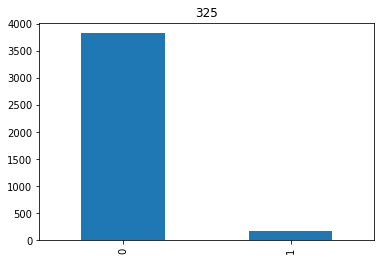

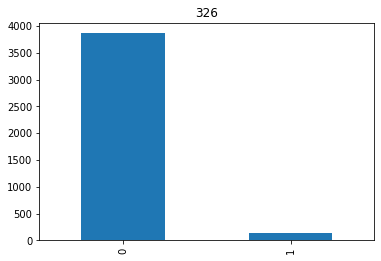

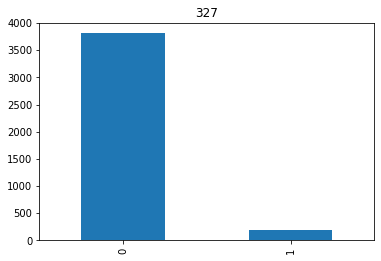

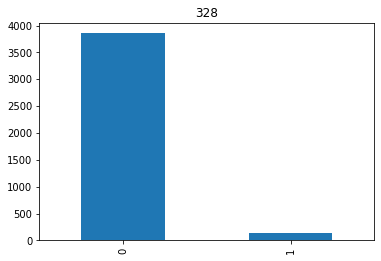

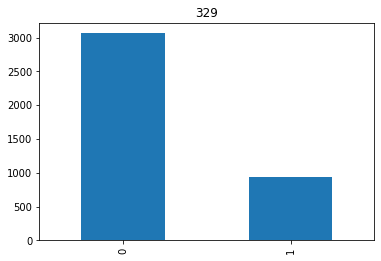

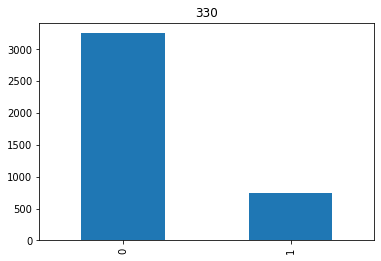

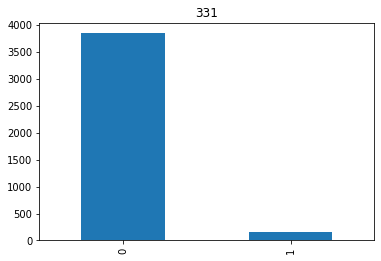

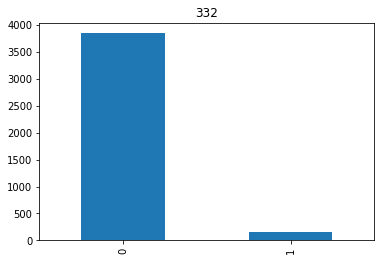

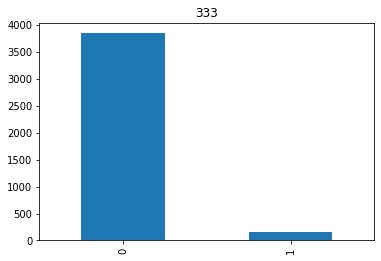

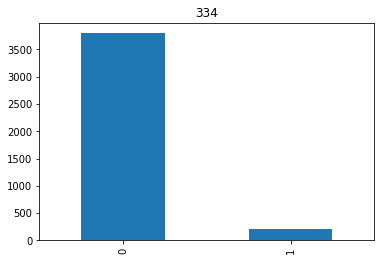

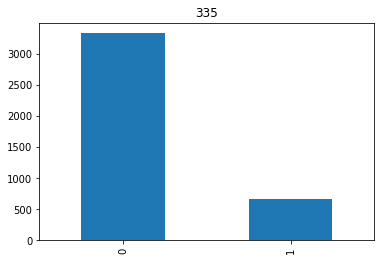

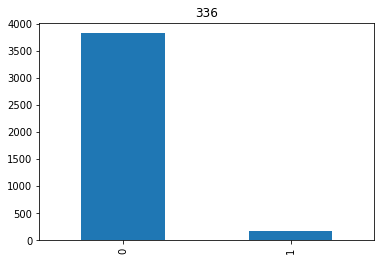

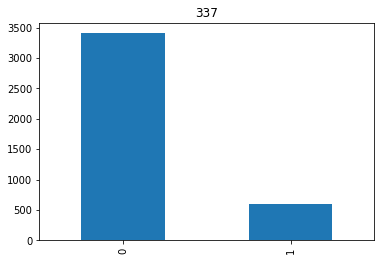

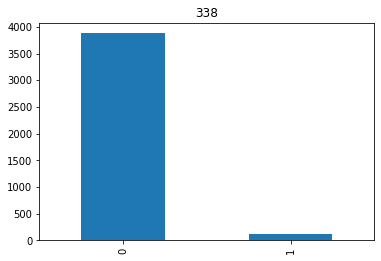

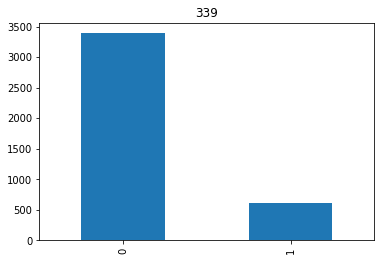

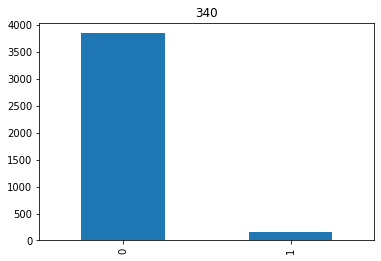

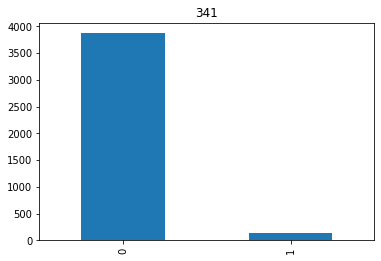

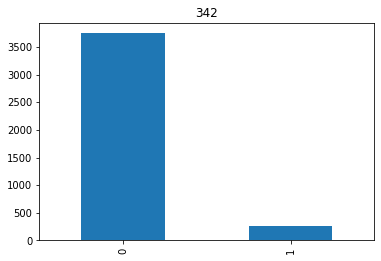

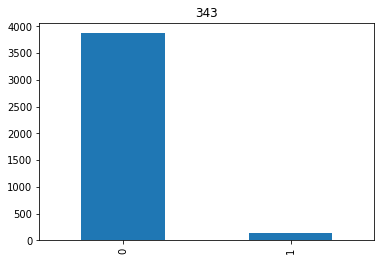

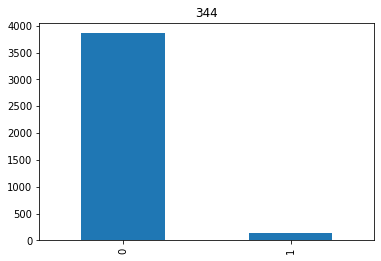

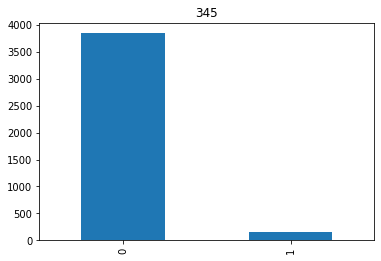

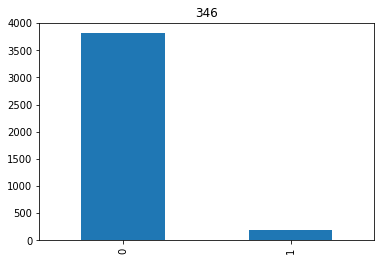

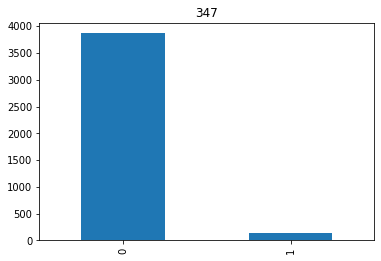

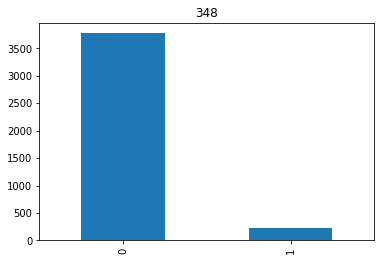

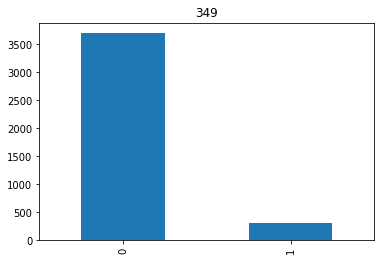

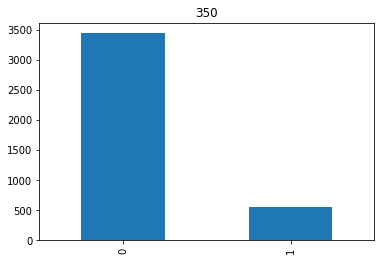

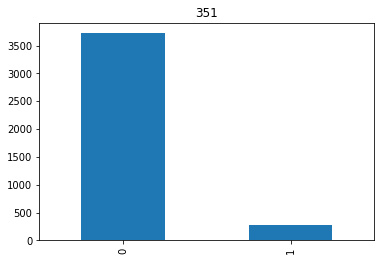

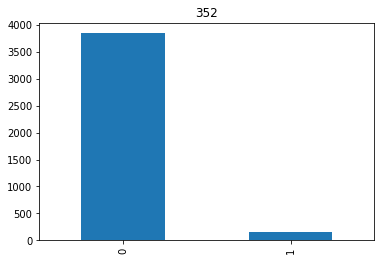

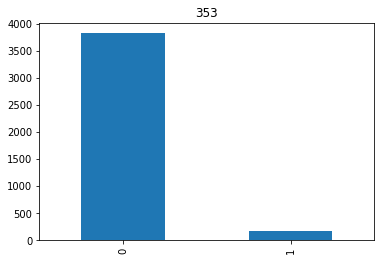

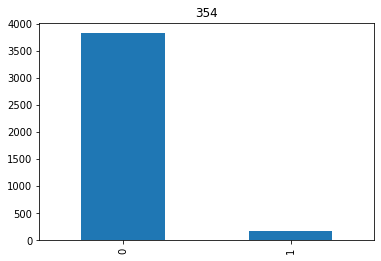

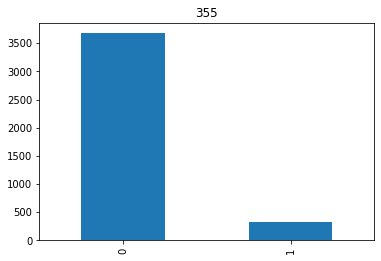

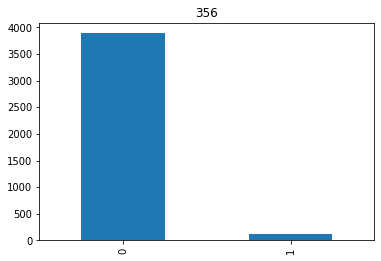

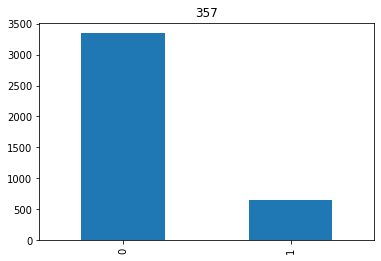

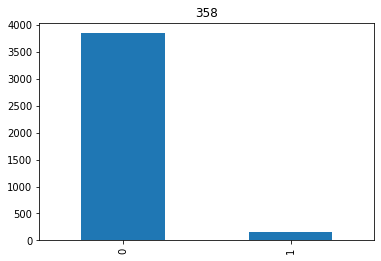

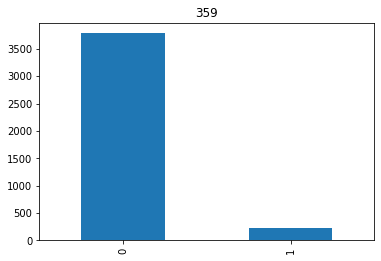

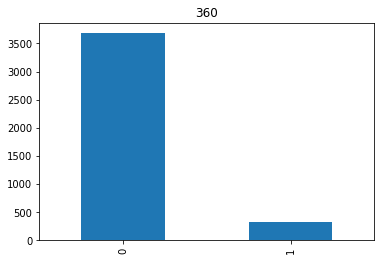

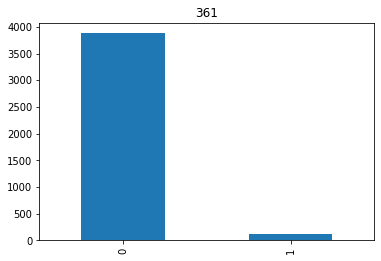

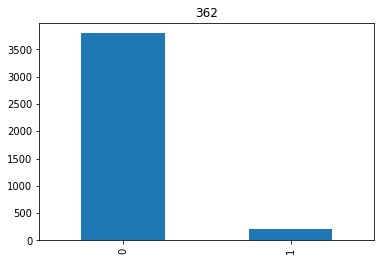

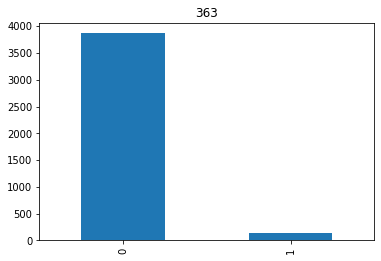

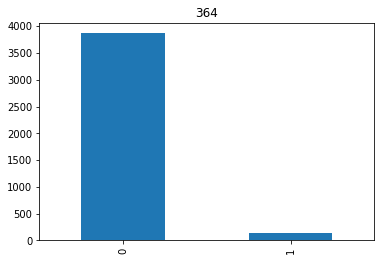

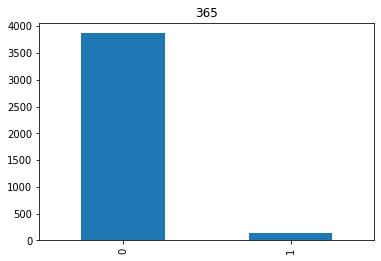

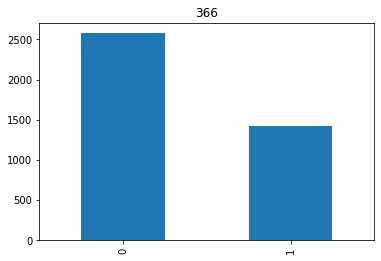

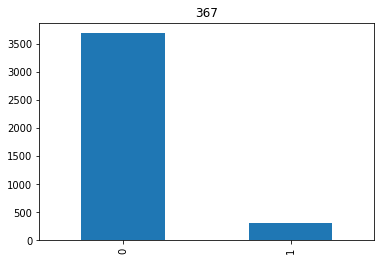

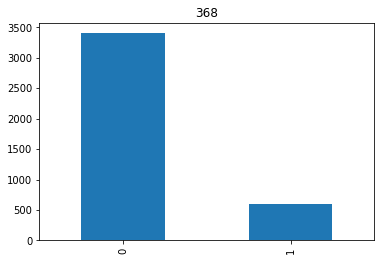

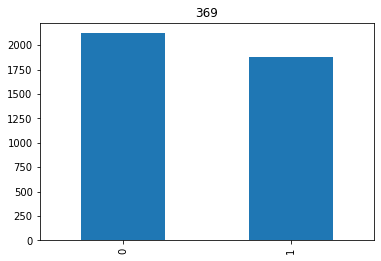

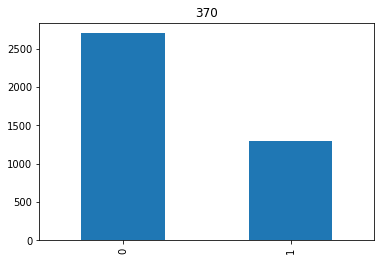

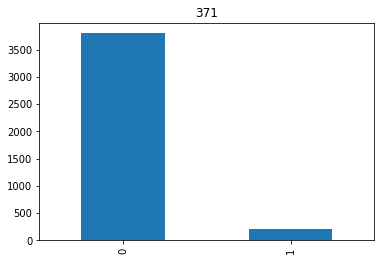

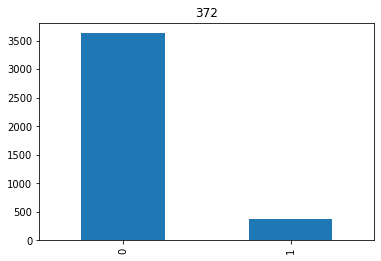

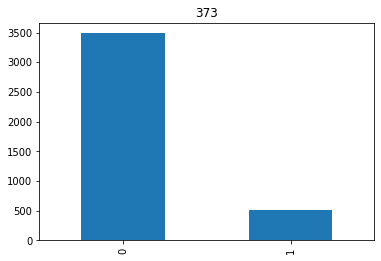

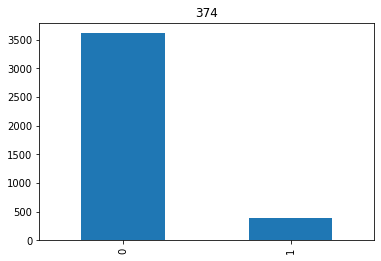

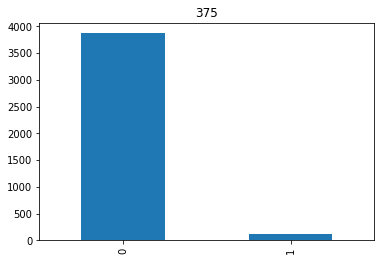

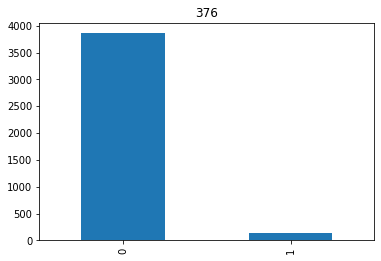

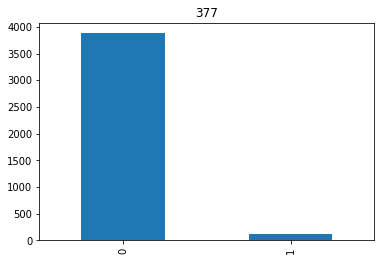

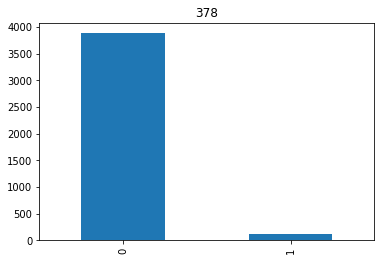

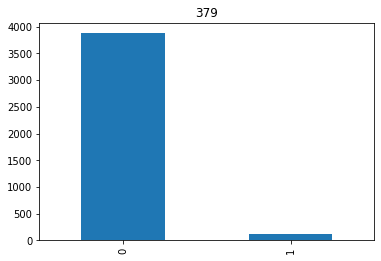

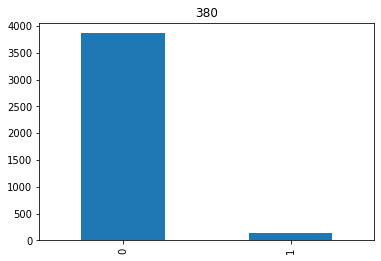

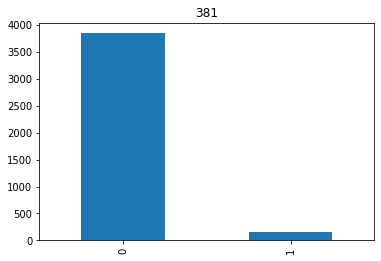

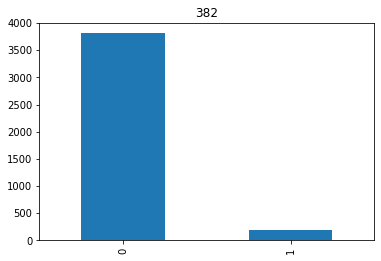

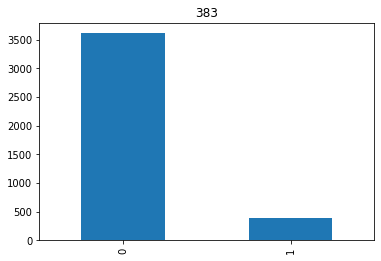

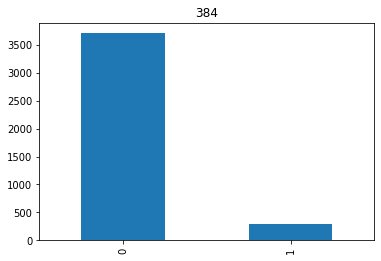

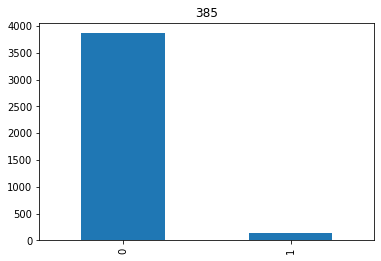

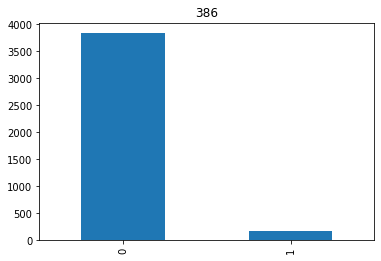

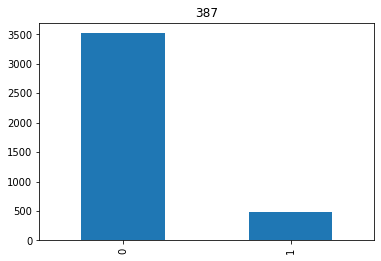

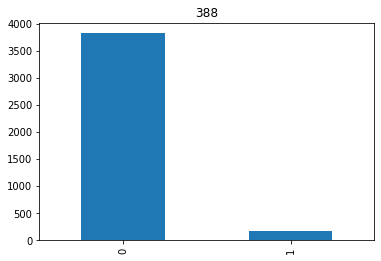

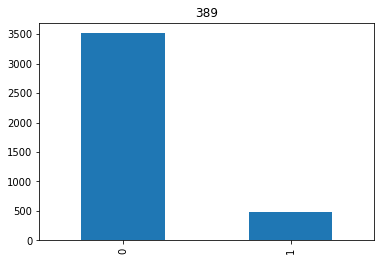

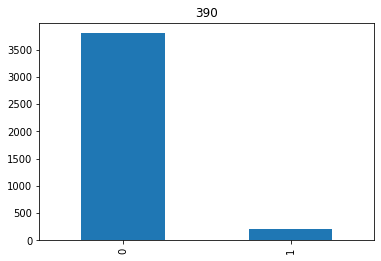

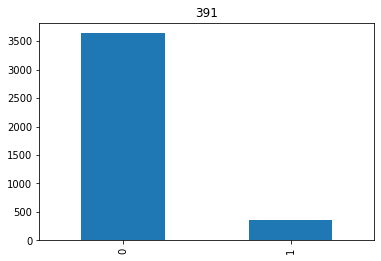

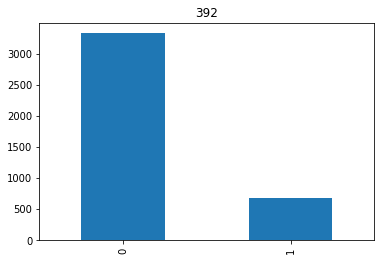

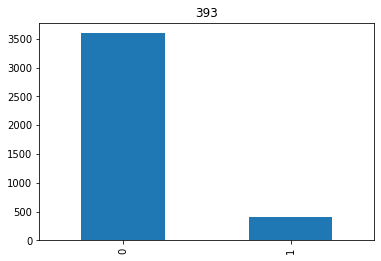

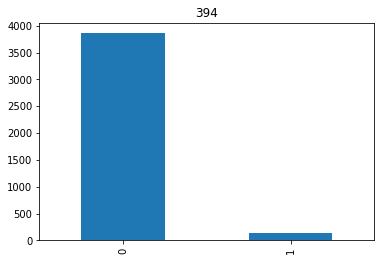

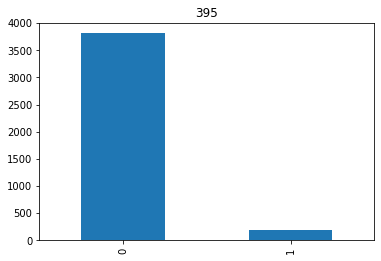

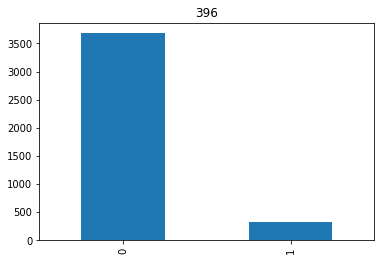

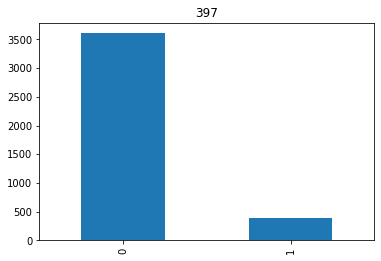

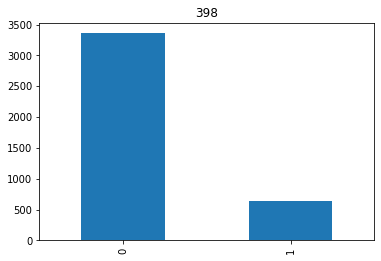

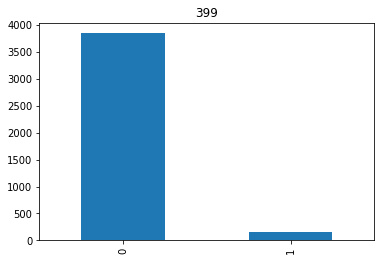

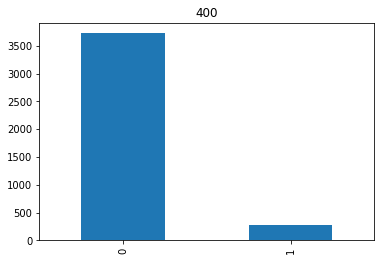

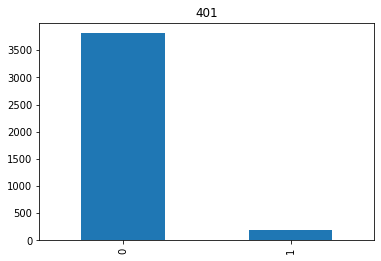

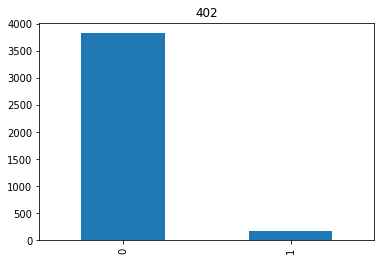

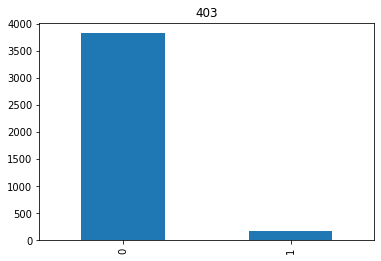

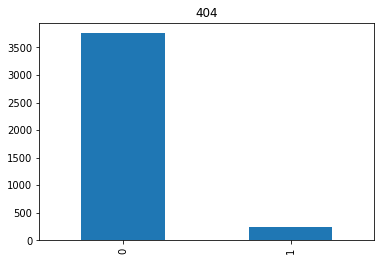

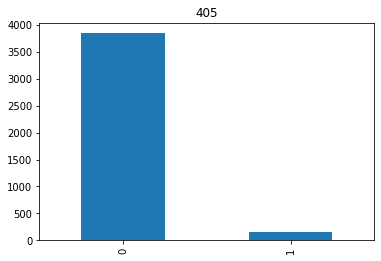

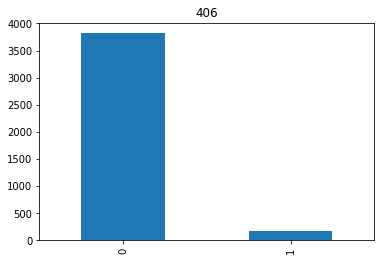

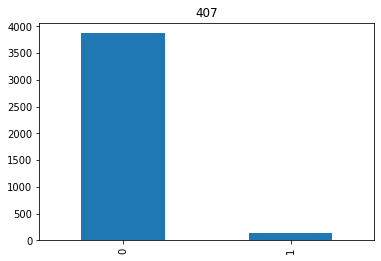

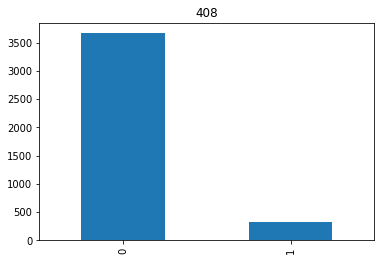

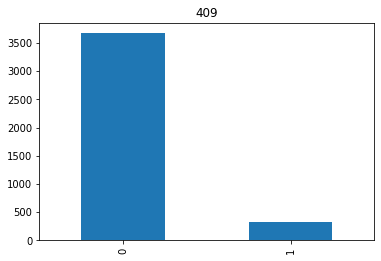

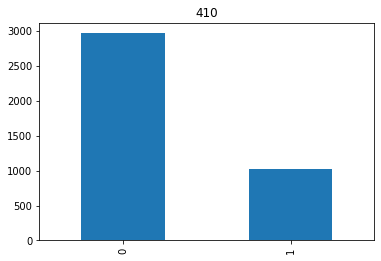

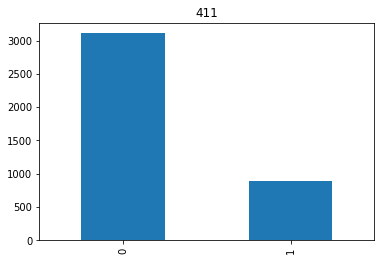

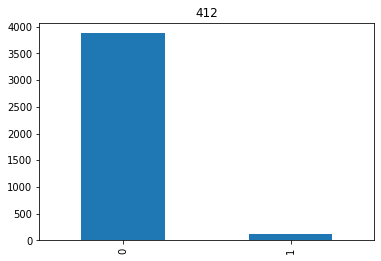

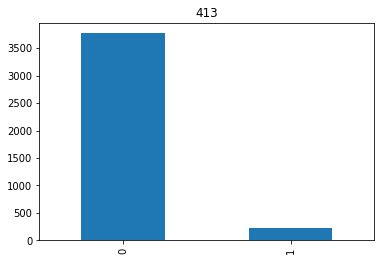

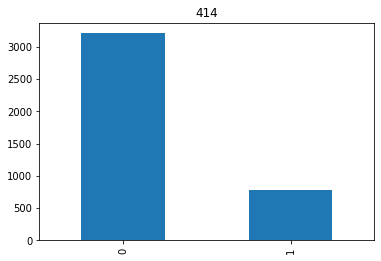

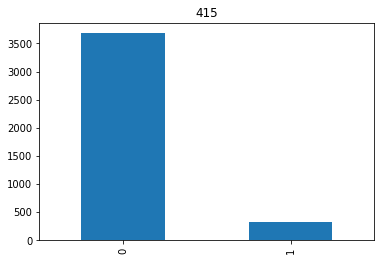

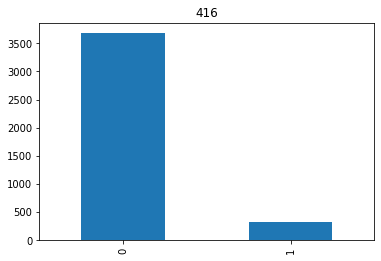

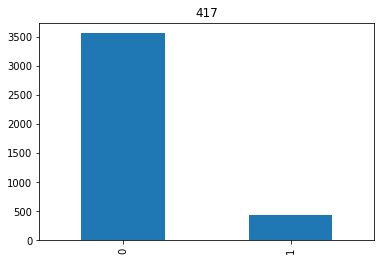

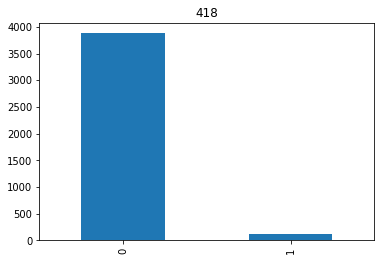

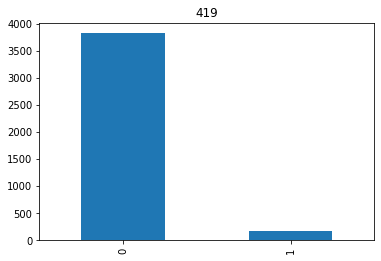

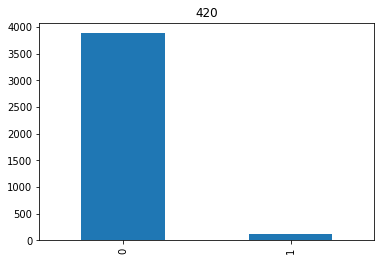

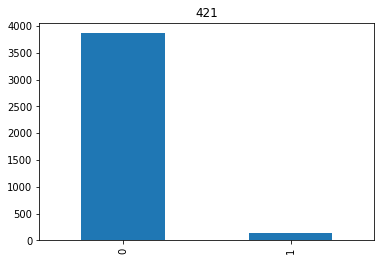

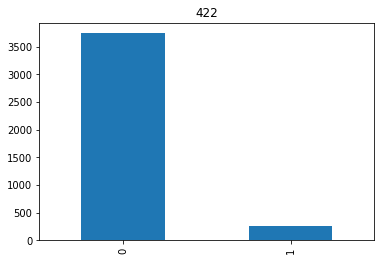

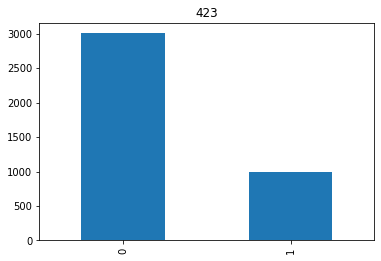

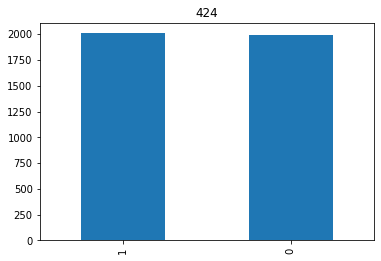

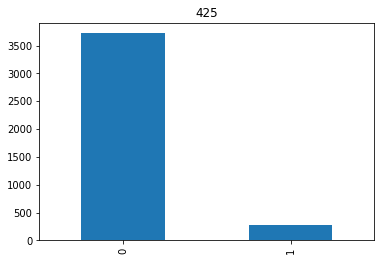

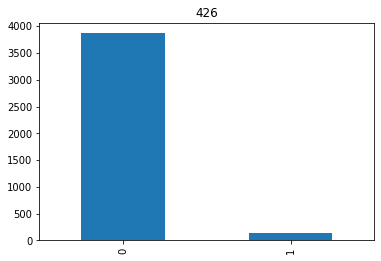

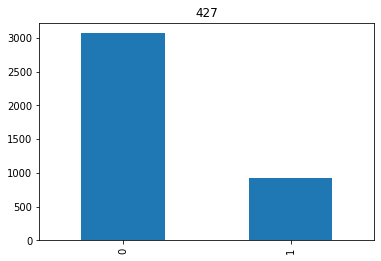

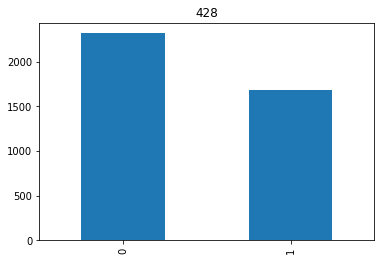

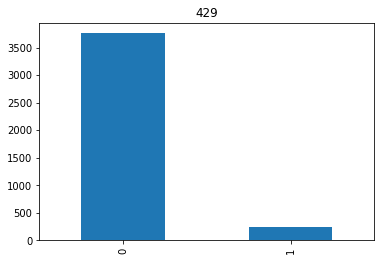

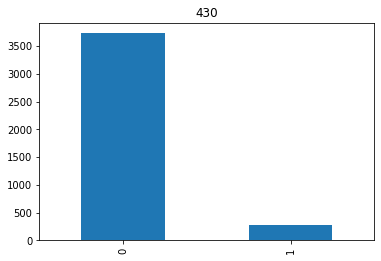

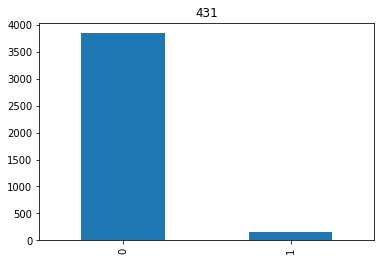

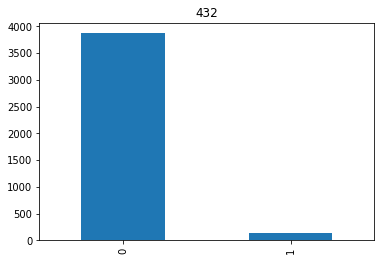

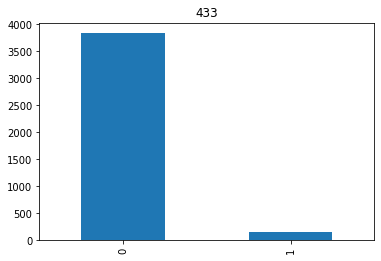

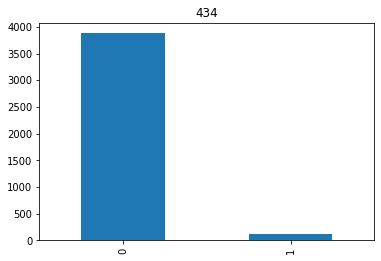

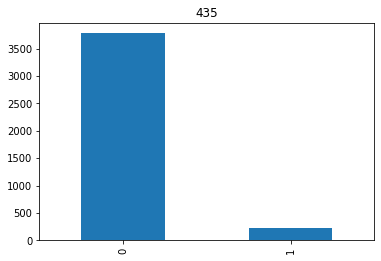

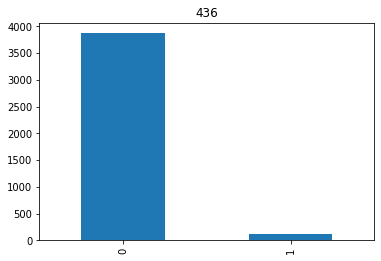

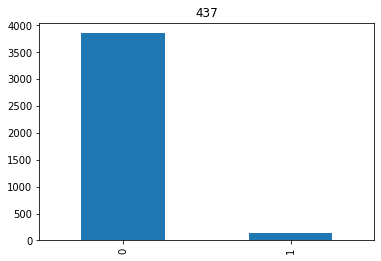

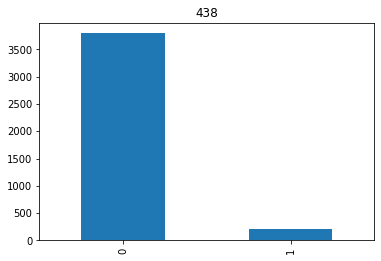

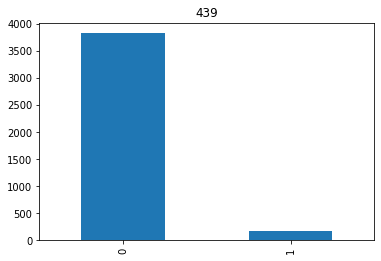

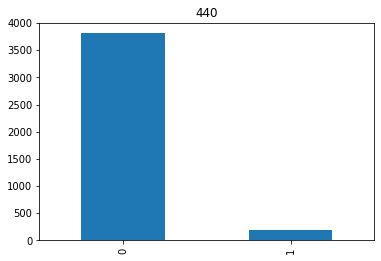

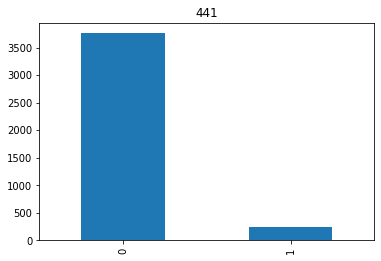

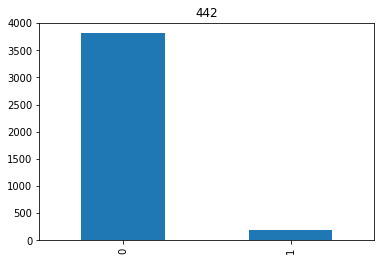

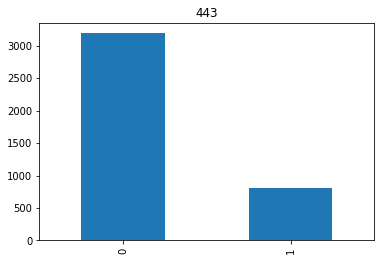

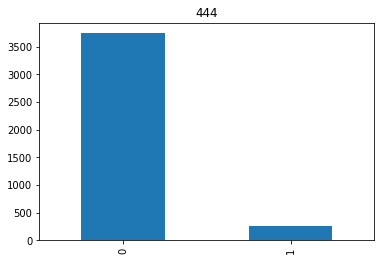

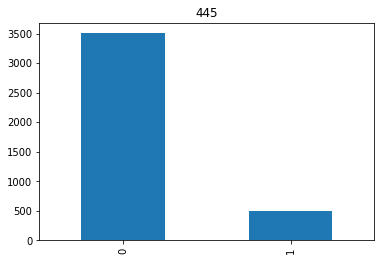

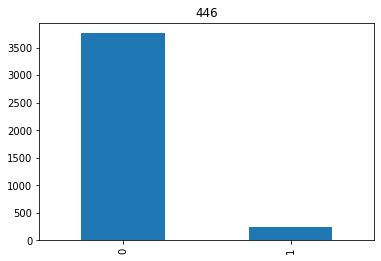

In [77]:
for col in locationTrain.columns:
    locationTrain[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [78]:
locationTrain.columns

Index(['class', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '437', '438', '439', '440', '441', '442', '443', '444', '445', '446'],
      dtype='object', length=447)

In [79]:
from sklearn.model_selection import train_test_split

X= locationTrain.iloc[:,1:]
y=locationTrain["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)


In [80]:
y_train.value_counts()

8     200
20    169
21    145
10    138
15    137
6     120
11    119
19    117
17    115
12    114
2     113
4     108
30    108
1     106
24    106
23    103
28    102
27    101
3      99
26     95
9      91
29     90
13     82
18     82
25     80
22     79
14     79
7      72
16     66
5      64
Name: class, dtype: int64

In [81]:
y_test.value_counts()

8     50
20    42
21    36
10    35
15    34
6     30
11    30
19    29
17    29
2     28
12    28
4     27
30    27
24    27
1     26
27    25
28    25
23    25
3     25
26    24
29    23
9     23
18    21
13    21
14    20
25    20
22    19
7     18
16    17
5     16
Name: class, dtype: int64

In [82]:
# Importing and fitting KNN classifier for k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)
pred

array([12, 14, 11, 20,  8, 25, 25,  3,  7,  7, 24,  7, 19, 14,  2, 20, 12,
        5,  2,  8,  1, 11,  8,  7, 20, 20, 12, 27,  7, 22, 30, 11,  8, 15,
        3,  3, 22,  8,  3, 13, 19,  5,  8,  3,  1,  3,  8,  9,  6,  1,  4,
        7, 10,  2, 11,  6,  1,  1, 17,  8,  3, 10,  9, 18, 20,  8,  6,  8,
       16,  7,  8, 12, 11, 30, 15,  8, 21, 10,  1,  3,  8, 22,  7,  8, 13,
        7, 21,  6,  2,  8, 15,  3, 11, 26,  3, 11,  4,  1, 30,  9,  3, 14,
        8,  4,  5, 21,  3, 28, 14, 10, 11, 19,  3,  7, 10, 12,  3,  3, 20,
        3, 14,  1, 15,  3,  8,  8, 15,  2,  8,  7, 12, 11,  6,  5,  7, 10,
        8, 30, 30,  5, 25, 10, 12,  2,  8, 29, 12, 18, 15,  8, 15,  1, 27,
       21, 16, 18,  3,  3,  8,  3,  4,  3, 22,  7,  3,  8, 19,  3,  6, 14,
        1, 19, 15,  7, 30,  7,  1, 21,  3, 13, 14, 29, 25, 27,  2,  8, 19,
        8, 20,  3, 19, 12, 11, 19, 30, 17,  8,  3, 15,  8, 19,  1, 20, 10,
       13,  3, 17,  8, 19, 14, 11, 16, 10, 12,  2,  8, 11, 19, 22, 26, 20,
        8, 10, 19,  7,  3

In [99]:
# Importing and fitting KNN classifier for k=11
knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(X_train,y_train)

pred2 = knn2.predict(X_test)

accuracy_score(pred2,y_test)
pred2

array([12, 24, 11, 20,  8, 25, 29, 19,  1, 24,  1,  7, 19, 19,  2, 20,  2,
       18,  2, 18,  1, 27, 24, 12, 20, 20, 17, 27,  7, 24,  8, 30,  8, 21,
       20, 11, 20,  8,  3, 13, 19,  8,  8,  3, 12, 10,  8, 15, 12,  1,  4,
        7, 19,  2, 11, 15, 15,  1, 22, 30, 25, 10, 13,  4, 30, 24,  8,  8,
        8,  7,  9, 19, 11, 13, 15,  1, 10,  1,  7, 29,  8, 22,  1,  8, 13,
        8, 26,  6,  2,  8, 15,  3, 30, 19, 19, 11,  4,  1,  3, 20,  3, 19,
        8,  4,  5, 21,  3, 10, 14,  1, 10, 26,  3,  1, 10, 25, 11,  3, 12,
        3, 12,  8, 15,  3,  8,  4, 15,  2,  8, 24, 12, 11,  8,  5, 19, 15,
       21, 30, 19,  2,  3, 10, 12, 20,  8, 29,  1, 20, 15,  8, 15,  8, 27,
       21, 16,  4,  3,  3, 30, 11,  4,  3, 22,  7, 29,  8, 19,  3,  6, 27,
        8, 19, 23,  7, 30, 13,  1, 21,  3,  2, 14, 29, 25, 27,  2,  7, 19,
        8, 20, 11,  3, 16, 15, 19, 19, 17,  8, 20, 15,  8, 24,  1, 20, 29,
       13, 19, 27,  8, 19,  8, 18, 19, 21, 12, 20, 30, 19, 19,  4, 11, 20,
        8, 10, 11,  1,  3

In [100]:
accuracy_score(pred2,y_test)


0.44375

In [101]:
# Importing and fitting KNN classifier for k=5
knn3 = KNeighborsClassifier(n_neighbors=5, metric="hamming")
knn3.fit(X_train,y_train)

pred3 = knn3.predict(X_test)

accuracy_score(pred3,y_test)
pred3

array([12, 24, 11, 20,  8, 18, 30, 19,  7,  7, 24,  7, 19, 14,  2, 20, 12,
        5,  2, 18,  1, 25, 24,  7, 20, 20,  2, 27,  7, 22, 30, 30,  8,  3,
        3, 26, 22,  8,  3, 13, 19,  8,  8,  3, 12, 15,  8,  9,  4,  1,  4,
       14,  3,  2, 11, 15,  1,  1,  9, 30,  3, 10,  9, 18, 30,  7,  6,  8,
        8,  7, 20, 12, 26, 19, 15,  8, 15, 10, 12, 29,  8, 22,  1,  8, 13,
        7, 20,  6,  2,  8, 15,  3, 11, 27,  3, 11,  1,  1,  3, 20,  3, 11,
        1,  4,  5, 28,  3, 28, 14, 10, 21, 26,  3, 10, 10,  3, 11,  3, 12,
        3,  8, 17, 15,  3,  8, 15, 10,  2,  8, 24, 12, 11,  6,  5, 30, 10,
        8, 19, 30,  5, 25, 10, 12,  2,  8,  4,  1,  5, 15,  8, 15,  1, 27,
       10, 16,  4,  3,  3,  8,  3,  4,  3, 22,  7,  3, 19, 19,  3,  6, 14,
        1, 25, 23,  5, 30,  1,  1, 21,  3, 13, 14, 29, 25, 27, 12,  1, 19,
        8, 20, 11,  3, 12, 15, 19, 26, 17,  8,  3, 15,  8, 24,  1, 20, 10,
        4, 11, 11,  8, 19, 10, 20, 19, 21, 12,  2, 19, 11, 19,  5, 26, 25,
        1, 10, 11,  1,  3

In [102]:
accuracy_score(pred3,y_test)

0.36875

In [87]:
### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

prediction = dtree.predict(X_test) 

In [89]:
prediction

array([14, 16, 15, 24,  8, 26, 30, 19,  7, 20,  8, 17, 19, 25,  2, 20, 28,
       18,  2, 30,  1, 16, 24, 14,  3, 19, 27,  9, 16, 22,  6, 26,  8,  6,
       30, 11, 21,  5,  3, 13, 16, 28, 29,  5,  7, 15,  8,  9,  6,  5,  5,
       22, 11, 24, 11, 12, 14,  6, 27, 11, 20, 24, 18, 13, 30, 22,  8,  6,
       19,  7,  9, 23, 24,  6, 12,  1, 15, 13,  7, 29, 20, 23, 23, 24, 13,
       24, 17,  8, 29,  6, 28,  8, 20, 22, 20, 18, 30, 19,  3, 21, 25, 11,
        8, 22,  8, 10, 13, 28, 12, 15, 21, 15, 25, 10,  6, 24, 15,  3, 24,
       20, 17, 12, 24, 29,  5,  5, 22, 14, 30, 21, 23, 27, 10,  8, 25, 17,
       11, 23, 15,  2,  5, 20, 28,  6, 20, 18,  6, 18, 15,  8, 27, 15, 28,
        9, 16,  4,  3, 27, 20, 11,  4, 30, 15,  7, 18,  8, 24,  3, 17, 30,
       28, 18, 15, 23, 30, 11,  1, 26, 11,  2, 10, 18, 10, 25, 15, 20, 16,
       19, 10, 19, 20, 14, 28, 15,  2, 21, 25, 16, 23, 11, 27,  1,  3, 29,
       29, 10, 17, 23, 19, 28, 18,  7, 28, 23, 20, 19, 27, 19,  4, 12,  9,
        8,  9, 20,  1, 25

[Text(0.9140146192096011, 0.9838709677419355, 'X[205] <= 0.5\ngini = 0.964\nsamples = 3200\nvalue = [106, 113, 99, 108, 64, 120, 72, 200, 91, 138, 119\n114, 82, 79, 137, 66, 115, 82, 117, 169, 145, 79\n103, 106, 80, 95, 101, 102, 90, 108]'),
 Text(0.836196379919677, 0.9516129032258065, 'X[256] <= 0.5\ngini = 0.963\nsamples = 3072\nvalue = [104, 27, 96, 106, 64, 116, 71, 196, 91, 136, 117\n112, 82, 77, 136, 66, 111, 80, 117, 168, 144, 78\n103, 104, 79, 94, 100, 102, 89, 106]'),
 Text(0.7129316962116238, 0.9193548387096774, 'X[39] <= 0.5\ngini = 0.962\nsamples = 2881\nvalue = [103, 27, 95, 22, 36, 114, 70, 194, 87, 136, 115\n110, 77, 75, 134, 66, 104, 69, 117, 165, 142, 68\n101, 99, 77, 92, 97, 101, 84, 104]'),
 Text(0.5693092483853796, 0.8870967741935484, 'X[135] <= 0.5\ngini = 0.96\nsamples = 2096\nvalue = [7, 24, 46, 20, 14, 59, 38, 33, 76, 105, 85, 73\n65, 70, 109, 61, 82, 60, 74, 145, 135, 63, 91\n68, 67, 81, 86, 92, 71, 96]'),
 Text(0.46943521092080664, 0.8548387096774194, 'X[410] 

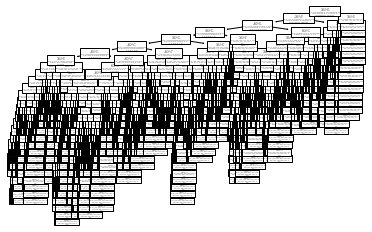

In [90]:
tree.plot_tree(dtree)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split, cross_val_score

start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 0.9063730239868164
accuracy: 0.5525
Cross validated scores: [0.5359375 0.5546875 0.5171875 0.540625  0.503125 ]


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split, cross_val_score

start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))
print("accuracy:",metrics.accuracy_score(y_test,rf_prediction))

cv_scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Cross validated scores:",cv_scores)

--- runtime --- 0.9219825267791748
accuracy: 0.55375
Cross validated scores: [0.4953125 0.503125  0.459375  0.515625  0.4875   ]


In [105]:
# FOR kaggle submission

# model on all data
knn3 = KNeighborsClassifier(n_neighbors=5, metric="hamming")
knn3.fit(X,y)

pred3 = knn3.predict(locationTest)

clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X,y)
rf_prediction = clf.predict(locationTest)


# predict
result = pd.DataFrame(rf_prediction,index= locationTest.index)


result.columns = ["class"]
print(result)
result.to_csv("location_test_result_RF.csv")

      class
ID         
4000      4
4001     20
4002     15
4003     21
4004     19
...     ...
5004      8
5005     20
5006     10
5007     20
5008      4

[1009 rows x 1 columns]
